# 3.- Merged NASA - Chilton f0F2 Data EDA & Cleansing
## July 2022
### Dr Jose M Albornoz

This notebook contains an exploratory data analysis for a dataset containing hourly values of f0F2 plus hourly values of the solar and geomagnetic parameters that influence electron content in the ionosphere.

It was found that most of these parameters contained outliers; hence this dataset was cleansed by replacing outliers with NANs.

DataRobot (https://www.datarobot.com/) was used to identify outliers.


The provenance of the data has been described in previous notebooks.

# Import necessary modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
%matplotlib inline

import random
import time

RANDOM_STATE = 801
pd.options.mode.chained_assignment = None

# maximum number of rdataframe ows and columns displayed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Dictionary

Solar & geomagnetic data was downloaded from NASA’s Space Physics Data Facility (SPDF) OMNI (Operating Missions as a Node on the Internet) https://omniweb.gsfc.nasa.gov/form/dx1.html. The following parameters are included in this dataset:

- **Timestamp**: hourly timestamp in YYYY-mm-DD HH:MM:SS format
- **f0f2**: F2 critical frquency, MHz    
- **Scalar B, nt**: Average Scalar Interplanetary Magnetic Field (IMF). A combined measure of the magnetic field strength in the north-south, east-west, and towards-Sun vs. away-from-Sun directions (https://www.spaceweatherlive.com/en/help/the-interplanetary-magnetic-field-imf.html).
- **Vector B Magnitude, nt**: Magnitude of IMF vector, $|<B>|$
- **Bx, By, Bz**: IMF components in Geocentric Solar Ecliptic (GSE) and Geocentric Solar Magnetospheric (GSM) coordiantes (https://www.spenvis.oma.be/help/background/coortran/coortran.html#GSE)
- **RMS_magnitude, nt**: RMS standard deviation in average IMF magnitude
- **RMS_field_vector, nT**: RMS standard deviation in IMF vector
- **RMS_BX_GSE, RMS_BY_GSE, RMS_BZ_GSE**: Standard deviation in GSE X, Y and Z IMF components
- **SW Plasma Temperature, K**: Solar wind plasma temperature												
- **SW Proton Density, N/cm^3**: Solar wind proton density
- **SW Plasma Speed, km/s**: Solar wind plasma speed	
- **Alpha/Proton ratio**: He$^{++}$/H$^+$ ratio
- **sigma-T, K**: Solar wind plasma temperature	standard deviation												
- **sigma-n, N/cm^3**: Solar wind proton density standard deviation 
- **sigma-V, km/s**: Solar wind plasma speed standard deviation													
- **sigma-ratio**: He$^{++}$/H$^+$ ratio standard deviation
- **Kp*10 index**: Planetary k-index (multiplied by 10)
- **R (Sunspot No.)**: Sunspot number
- **Dst-index, nT**: Disturbanse storm time index
- **ap_index, nT**: Daily average level for geomagnetic activity
- **f10.7_index**: Solar radio flux at a wavelength of 10.7 cm at the earth's orbit
- **AE-index, nT, AL-index, nT, AU-index, nT**: Auroral zone magnetic disturbance levels indices
- **pc-index**: Polar cap magnetic index
- **Lyman_alpha**: Hydrogen Lyman α emission
- **Proton flux (>1 Mev), Proton flux (>2 Mev), Proton flux (>4 Mev), Proton flux (>10 Mev), Proton flux (>30 Mev), Proton flux (>60 Mev)**: Solar proton flux
- **Flux FLAG**: Magnetospheric Flux Flag

# 1.- Load data

In [2]:
df_0 = pd.read_csv("Data/merged_f0F2_solar_geomagnetic_v1.csv")

In [3]:
df_0.shape

(100032, 39)

In [4]:
df_0.head()

,Timestamp,f0f2,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)","RMS_magnitude, nT","RMS_field_vector, nT","RMS_BX_GSE, nT","RMS_BY_GSE, nT","RMS_BZ_GSE, nT","SW Plasma Temperature, K","SW Proton Density, N/cm^3","SW Plasma Speed, km/s",Alpha/Prot. ratio,"sigma-T,K","sigma-n, N/cm^3)","sigma-V, km/s",sigma-ratio,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG
0,1995-02-01 00:00:00,NaN,5.6,5.0,4.3,-2.5,-0.3,-2.1,-1.4,0.1,2.4,1.4,1.6,1.2,157847,2.3,607,0.022,36670,0.3,20,0.005,30,54,-31,15,84.6,194,-109,84,1.6,0.006538,2.38,1.20,0.91,0.82,0.77,0.69,-1
1,1995-02-01 01:00:00,NaN,5.6,4.8,4.2,-2.3,-0.5,-1.9,-1.4,0.2,2.6,1.9,1.2,1.4,174639,2.3,616,0.024,35898,0.3,24,0.005,30,54,-30,15,84.6,152,-68,84,1.8,0.006538,999999.99,99999.99,99999.99,99999.99,99999.99,99999.99,0
2,1995-02-01 02:00:00,NaN,5.3,3.6,2.0,-3.0,-0.3,-2.6,-1.5,0.3,3.7,2.7,2.0,1.6,212065,2.4,644,0.029,45402,0.4,31,0.004,30,54,-31,15,84.6,259,-137,121,2.6,0.006538,2.35,1.09,0.83,0.73,0.64,0.53,-1
3,1995-02-01 03:00:00,NaN,5.4,4.6,4.4,-0.4,1.2,-0.8,1.0,0.1,2.6,0.7,2.0,1.6,233439,2.5,622,0.026,37142,0.2,11,0.003,33,54,-32,18,84.6,201,-90,109,2.0,0.006538,2.48,1.08,0.77,0.69,0.62,0.51,-1
4,1995-02-01 04:00:00,NaN,5.4,3.8,2.8,-2.4,-0.9,-2.0,-1.6,0.1,3.5,1.6,2.1,2.3,239969,2.5,640,0.027,39771,0.2,21,0.001,33,54,-29,18,84.6,113,-28,83,1.2,0.006538,2.40,1.01,0.77,0.68,0.62,0.55,-1


In [5]:
df_0.describe()

,f0f2,"Scalar B, nT","Vector B Magnitude,nT","BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)","RMS_magnitude, nT","RMS_field_vector, nT","RMS_BX_GSE, nT","RMS_BY_GSE, nT","RMS_BZ_GSE, nT","SW Plasma Temperature, K","SW Proton Density, N/cm^3","SW Plasma Speed, km/s",Alpha/Prot. ratio,"sigma-T,K","sigma-n, N/cm^3)","sigma-V, km/s",sigma-ratio,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha,Proton flux (>1 Mev),Proton flux (>2 Mev),Proton flux (>4 Mev),Proton flux (>10 Mev),Proton flux (>30 Mev),Proton flux (>60 Mev),Flux FLAG
count,93697.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,1.000320e+05,100032.000000,100032.000000,100032.000000,1.000320e+05,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000,100032.000000
mean,5.580767,10.251935,9.552178,3.688835,3.920538,3.720992,3.906609,3.660435,4.155532,6.105248,4.875897,5.027520,5.210238,5.378015e+05,49.974667,494.929822,1.253248,4.503092e+05,44.366924,63.519404,1.225520,21.459813,89.262476,-15.990693,12.902951,123.983853,213.929413,-132.136626,81.722759,1.335415,0.007536,397144.808245,39744.587562,39728.795223,35392.329536,35419.714543,35432.597755,-0.646293
std,2.301045,60.962499,60.998936,61.395356,61.413791,61.354751,61.406265,61.366809,61.246989,61.148793,61.207030,61.201405,61.192295,2.023341e+06,203.072314,723.236501,3.260945,2.039590e+06,204.208185,748.175564,3.271227,14.126796,71.543056,23.593301,19.366426,56.302662,214.612022,156.462099,74.301182,15.856653,0.001107,489246.134878,48906.799248,48919.641544,47812.082505,47825.047961,47830.113213,0.478122
min,0.900000,0.600000,0.100000,-40.800000,-33.000000,-53.700000,-43.100000,-57.800000,0.000000,0.000000,0.000000,0.000000,0.000000,3.450000e+03,0.100000,228.000000,0.001000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-422.000000,0.000000,65.700000,5.000000,-2452.000000,-260.000000,-21.500000,0.005654,0.010000,0.020000,0.010000,0.010000,0.010000,0.010000,-1.000000
25%,3.800000,4.500000,3.900000,-3.000000,-2.800000,-1.500000,-2.600000,-1.700000,0.100000,1.200000,0.500000,0.600000,0.700000,4.360725e+04,3.300000,365.000000,0.025000,5.062000e+03,0.300000,3.000000,0.003000,10.000000,27.000000,-25.000000,4.000000,81.000000,59.000000,-186.000000,29.000000,0.100000,0.006511,0.880000,0.800000,0.730000,0.550000,0.410000,0.310000,-1.000000
50%,5.300000,5.800000,5.100000,-0.200000,0.200000,0.000000,0.200000,-0.100000,0.300000,2.000000,0.900000,1.000000,1.100000,8.328200e+04,5.300000,418.000000,0.039000,1.020800e+04,0.400000,5.000000,0.005000,20.000000,72.000000,-12.000000,7.000000,111.750000,133.000000,-70.000000,57.000000,0.700000,0.007347,9.635000,3.200000,1.200000,0.770000,0.660000,0.530000,-1.000000
75%,6.800000,7.600000,6.900000,2.900000,3.000000,1.400000,2.900000,1.600000,0.500000,3.000000,1.500000,1.600000,1.900000,1.522955e+05,8.900000,498.000000,0.056000,1.937925e+04,0.900000,9.000000,0.009000,30.000000,141.000000,-2.000000,15.000000,156.200000,300.000000,-26.000000,112.000000,1.700000,0.008427,999999.990000,99999.990000,99999.990000,99999.990000,99999.990000,99999.990000,0.000000
max,16.000000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,9.999999e+06,999.900000,9999.000000,9.999000,9.999999e+06,999.900000,9999.000000,9.999000,90.000000,353.000000,67.000000,400.000000,999.900000,2241.000000,22.000000,1226.000000,999.900000,0.010603,999999.990000,99999.990000,99999.990000,99999.990000,99999.990000,99999.990000,0.000000


In [6]:
df_0.isna().sum()

Timestamp                       0
f0f2                         6335
Scalar B, nT                    0
Vector B Magnitude,nT           0
BX, nT (GSE, GSM)               0
BY, nT (GSE)                    0
BZ, nT (GSE)                    0
BY, nT (GSM)                    0
BZ, nT (GSM)                    0
RMS_magnitude, nT               0
RMS_field_vector, nT            0
RMS_BX_GSE, nT                  0
RMS_BY_GSE, nT                  0
RMS_BZ_GSE, nT                  0
SW Plasma Temperature, K        0
SW Proton Density, N/cm^3       0
SW Plasma Speed, km/s           0
Alpha/Prot. ratio               0
sigma-T,K                       0
sigma-n, N/cm^3)                0
sigma-V, km/s                   0
sigma-ratio                     0
Kp index                        0
R (Sunspot No.)                 0
Dst-index, nT                   0
ap_index, nT                    0
f10.7_index                     0
AE-index, nT                    0
AL-index, nT                    0
AU-index, nT  

In [7]:
df_0['Timestamp'] = pd.to_datetime(df_0['Timestamp'])

In [8]:
df_0['Timestamp'].min()

Timestamp('1995-02-01 00:00:00')

In [9]:
df_0['Timestamp'].max()

Timestamp('2006-06-30 23:00:00')

In [10]:
df_0.set_index('Timestamp', inplace=True) 

# 2.- Parameter plots 

In the following sections we will plot the solar & geomagnetics parameters associated with f0F2 in order to detect data quality issues; these issues will then be corrected by suitable cleansing. 

## 2.1.- Scalar B

Text(0.5, 1.0, 'Scalar B')

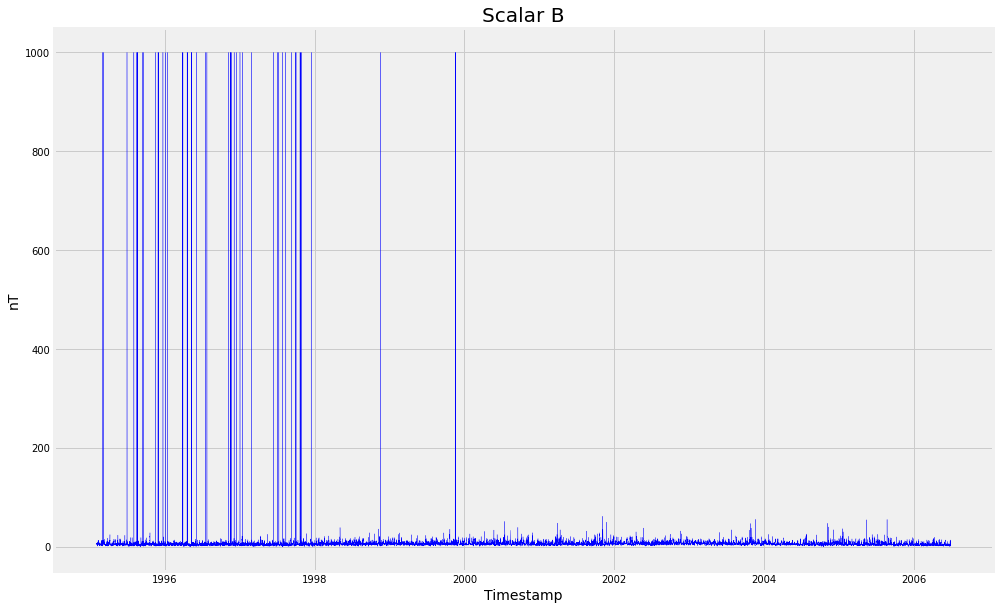

In [11]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Scalar B, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('Scalar B', fontsize=20)

In [12]:
df_0['Scalar B, nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [13]:
df_0['Scalar B, nT'] = np.where(df_0['Scalar B, nT'] >= 999.9, np.nan, df_0['Scalar B, nT'])

The resulting percentage of missing values is:

In [14]:
df_0['Scalar B, nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'Scalar B after cleansing')

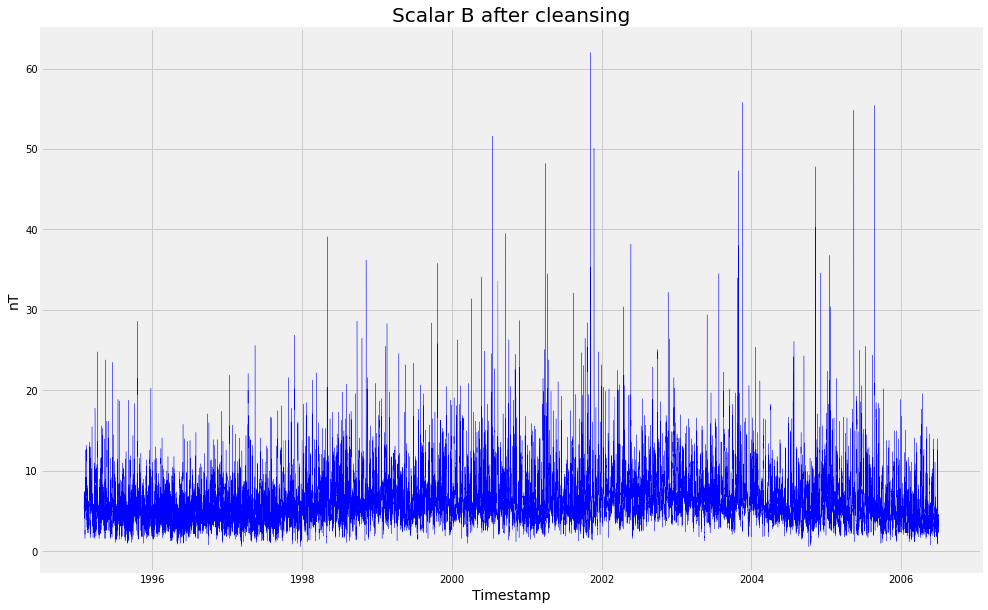

In [15]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Scalar B, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('Scalar B after cleansing', fontsize=20)

In [16]:
df_0['Scalar B, nT'].describe()

count    99655.000000
mean         6.508046
std          3.361350
min          0.600000
25%          4.500000
50%          5.800000
75%          7.600000
max         62.000000
Name: Scalar B, nT, dtype: float64

## 2.2.- Vector B Magnitude

Text(0.5, 1.0, 'Vector B Magnitude')

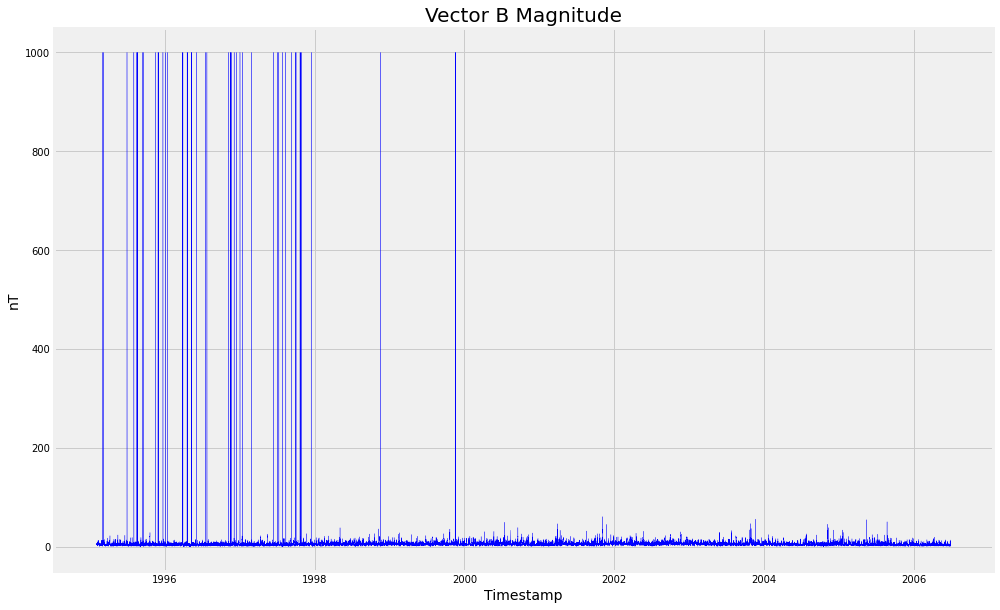

In [17]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Vector B Magnitude,nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('Vector B Magnitude', fontsize=20)

In [18]:
df_0['Vector B Magnitude,nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [19]:
df_0['Vector B Magnitude,nT'] = np.where(df_0['Vector B Magnitude,nT'] >= 982.66, np.nan, df_0['Vector B Magnitude,nT'])

The resulting percentage of missing values is:

In [20]:
df_0['Vector B Magnitude,nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'Vector B Magnitude after cleansing')

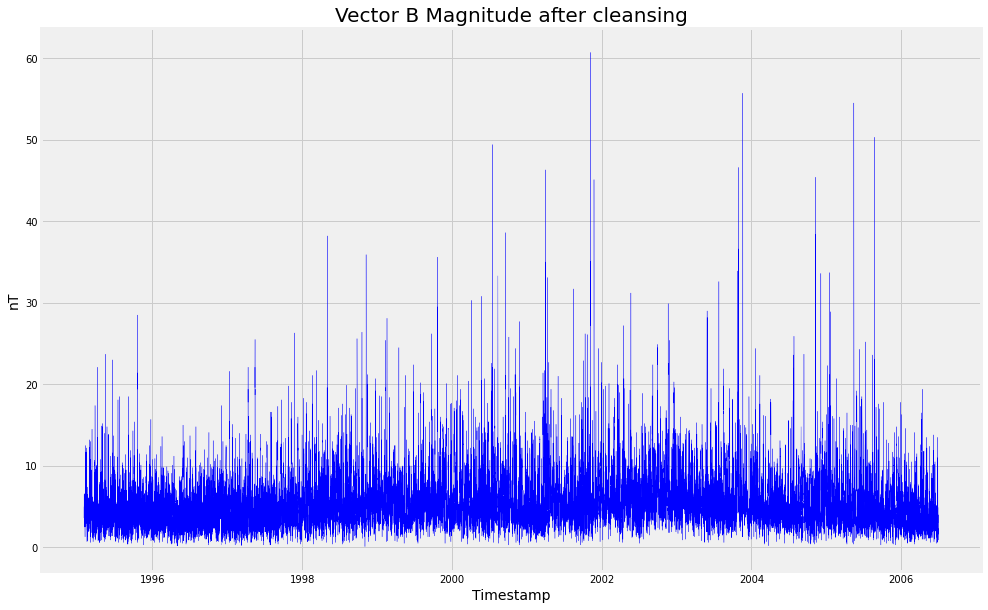

In [21]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Vector B Magnitude,nT'], color='blue', linewidth=0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('Vector B Magnitude after cleansing', fontsize=20)

In [22]:
df_0['Vector B Magnitude,nT'].describe()

count    99655.000000
mean         5.805641
std          3.240065
min          0.100000
25%          3.900000
50%          5.100000
75%          6.900000
max         60.700000
Name: Vector B Magnitude,nT, dtype: float64

## 2.3.- BX (GSE, GSM)

Text(0.5, 1.0, 'BX (GSE, GSM)')

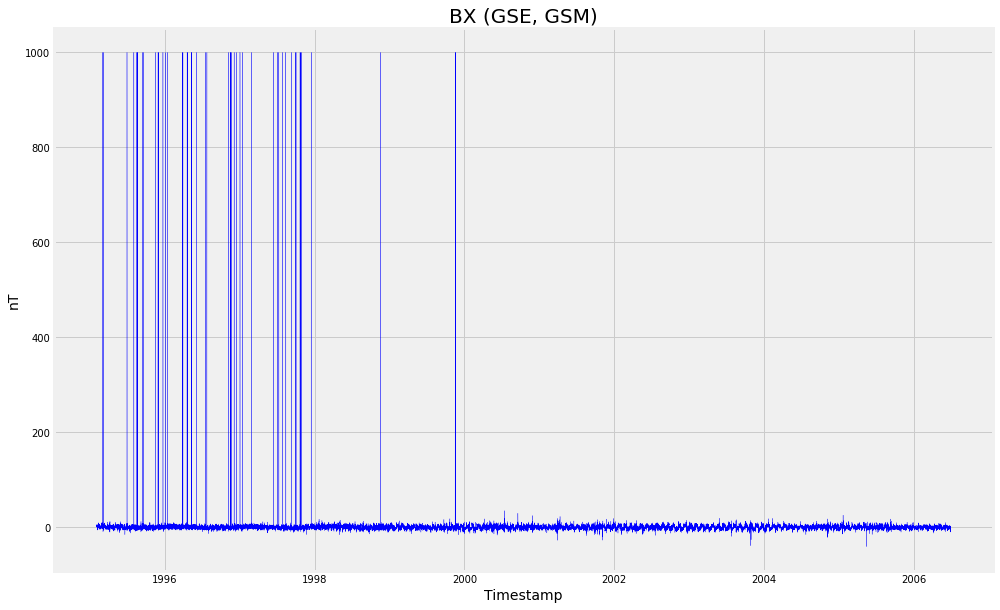

In [23]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BX, nT (GSE, GSM)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BX (GSE, GSM)', fontsize=20)

In [24]:
df_0['BX, nT (GSE, GSM)'].max()

999.9

DataRobot identified outliers in this feature with a value of 981.965

We will replace outliers with nans

In [25]:
df_0['BX, nT (GSE, GSM)'] = np.where(df_0['BX, nT (GSE, GSM)'] >= 981.965, np.nan, df_0['BX, nT (GSE, GSM)'])

The resulting percentage of missing values is:

In [26]:
df_0['BX, nT (GSE, GSM)'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'BX (GSE, GSM) after cleansing')

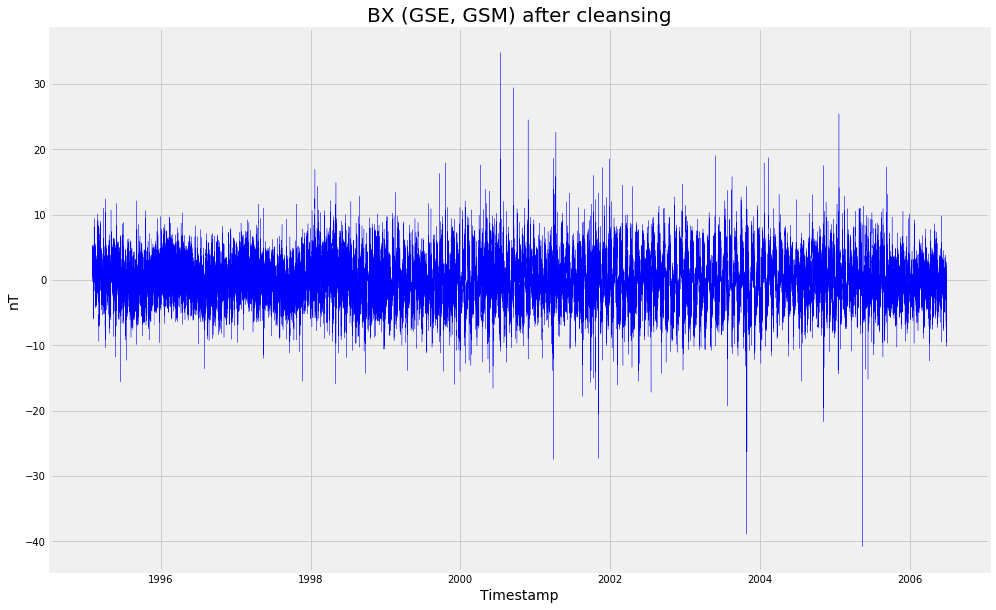

In [27]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BX, nT (GSE, GSM)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BX (GSE, GSM) after cleansing', fontsize=20)

In [28]:
df_0['BX, nT (GSE, GSM)'].describe()

count    99655.000000
mean        -0.079884
std          3.869046
min        -40.800000
25%         -3.000000
50%         -0.200000
75%          2.900000
max         34.800000
Name: BX, nT (GSE, GSM), dtype: float64

## 2.4.- BY (GSE)

Text(0.5, 1.0, 'BY (GSE)')

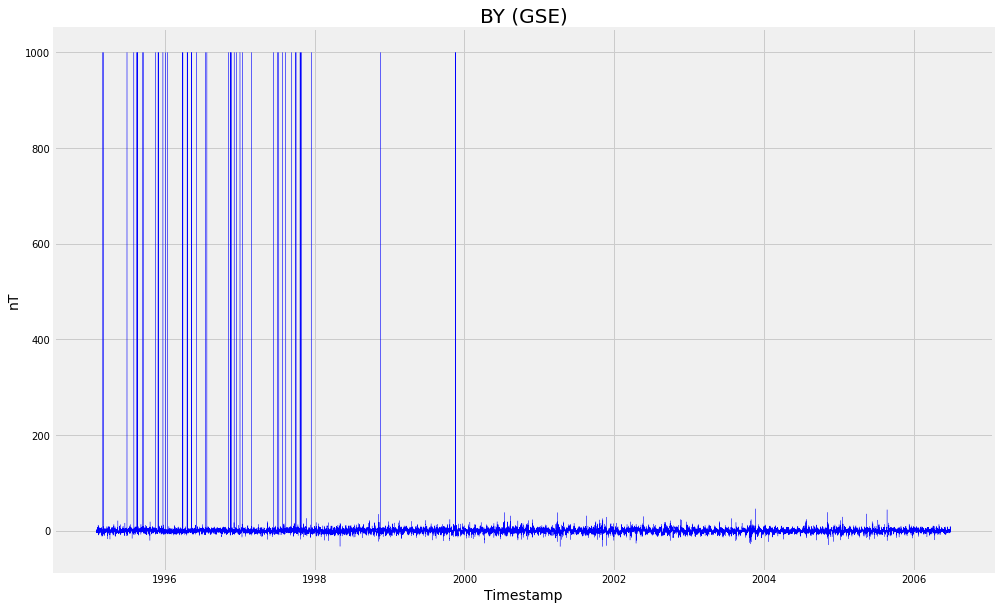

In [29]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BY, nT (GSE)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BY (GSE)', fontsize=20)

In [30]:
df_0['BY, nT (GSE)'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [31]:
df_0['BY, nT (GSE)'] = np.where(df_0['BY, nT (GSE)'] >= 982.09, np.nan, df_0['BY, nT (GSE)'])

The resulting percentage of missing values is:

In [32]:
df_0['BY, nT (GSE)'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'BY (GSE) after cleansing')

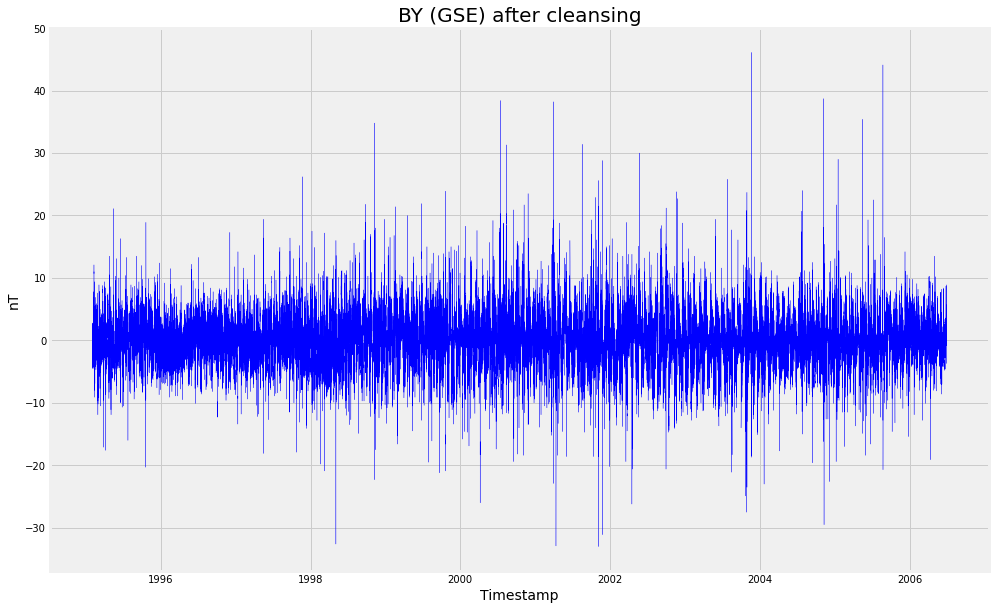

In [33]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BY, nT (GSE)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BY (GSE) after cleansing', fontsize=20)

In [34]:
df_0['BY, nT (GSE)'].describe()

count    99655.000000
mean         0.152697
std          4.358312
min        -33.000000
25%         -2.800000
50%          0.200000
75%          3.000000
max         46.100000
Name: BY, nT (GSE), dtype: float64

## 2.5.- BZ (GSE)

Text(0.5, 1.0, 'BZ (GSE)')

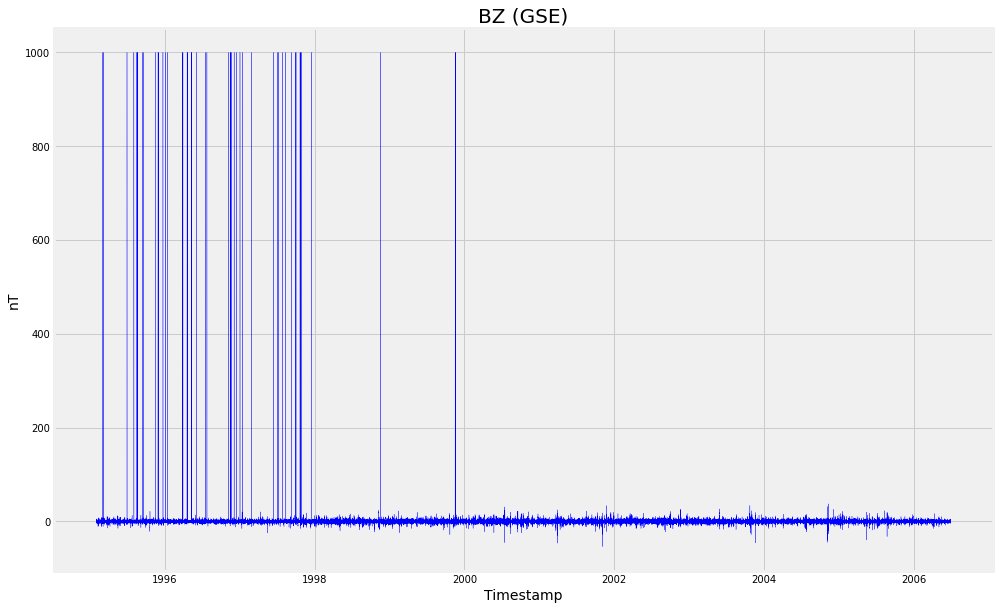

In [35]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BZ, nT (GSE)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BZ (GSE)', fontsize=20)

In [36]:
df_0['BZ, nT (GSE)'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [37]:
df_0['BZ, nT (GSE)'] = np.where(df_0['BZ, nT (GSE)'] >= 999.9, np.nan, df_0['BZ, nT (GSE)'])

The resulting percentage of missing values is:

In [38]:
df_0['BZ, nT (GSE)'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'BZ (GSE) after cleansing')

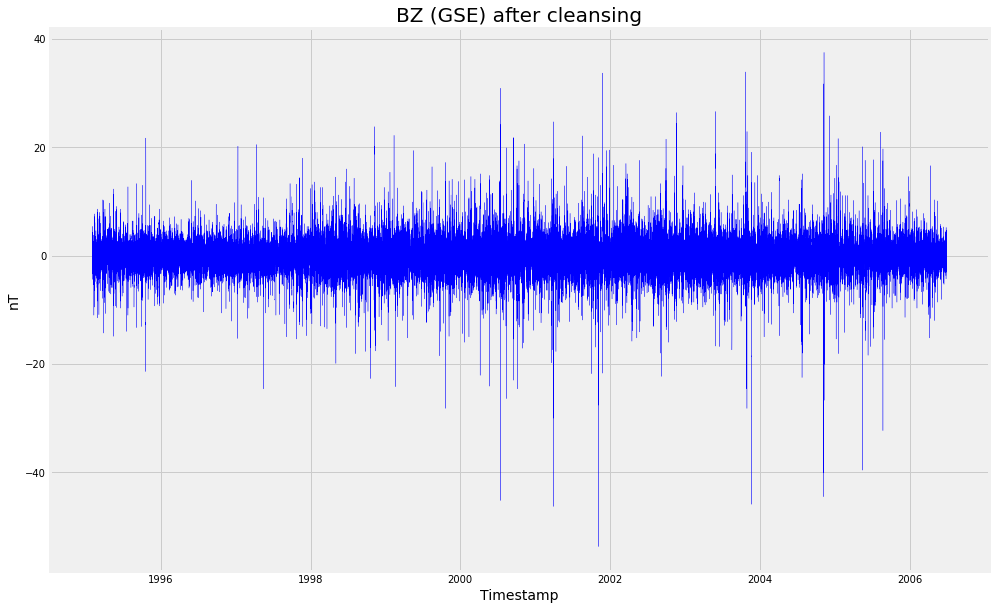

In [39]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BZ, nT (GSE)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BZ (GSE) after cleansing', fontsize=20)

In [40]:
df_0['BZ, nT (GSE)'].describe()

count    99655.000000
mean        -0.047604
std          3.195257
min        -53.700000
25%         -1.500000
50%          0.000000
75%          1.400000
max         37.500000
Name: BZ, nT (GSE), dtype: float64

## 2.6.- BY (GSM)

Text(0.5, 1.0, 'BY (GSM)')

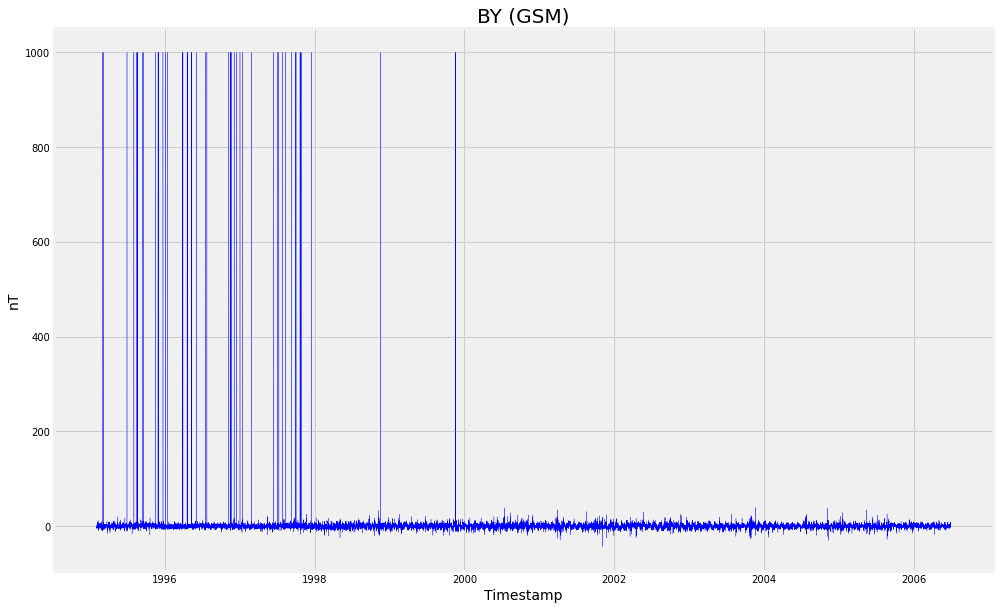

In [41]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BY, nT (GSM)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BY (GSM)', fontsize=20)

In [42]:
df_0['BY, nT (GSM)'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [43]:
df_0['BY, nT (GSM)'] = np.where(df_0['BY, nT (GSM)'] >= 999.9, np.nan, df_0['BY, nT (GSM)'])

The resulting percentage of missing values is:

In [44]:
df_0['BY, nT (GSM)'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'BY (GSM) after cleansing')

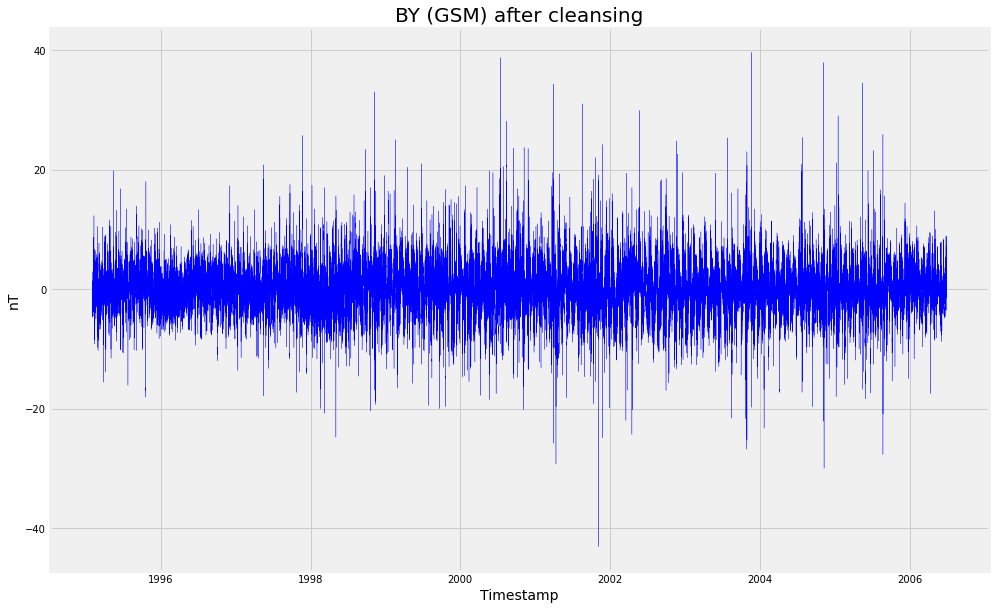

In [45]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BY, nT (GSM)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BY (GSM) after cleansing', fontsize=20)

In [46]:
df_0['BY, nT (GSM)'].describe()

count    99655.000000
mean         0.138715
std          4.238130
min        -43.100000
25%         -2.600000
50%          0.200000
75%          2.900000
max         39.600000
Name: BY, nT (GSM), dtype: float64

## 2.7.- BZ (GSM)

Text(0.5, 1.0, 'BZ (GSM)')

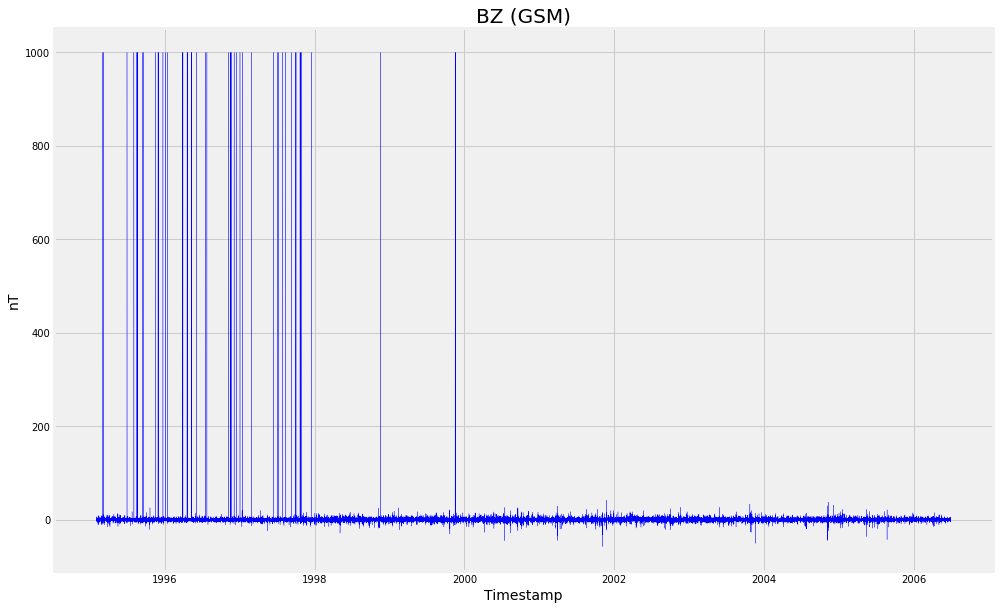

In [47]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BZ, nT (GSM)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BZ (GSM)', fontsize=20)

In [48]:
df_0['BZ, nT (GSM)'].max()

999.9

DataRobot identified outliers in this feature with a value of 981.6

We will replace outliers with nans

In [49]:
df_0['BZ, nT (GSM)'] = np.where(df_0['BZ, nT (GSM)'] >= 981.6, np.nan, df_0['BZ, nT (GSM)'])

The resulting percentage of missing values is:

In [50]:
df_0['BZ, nT (GSM)'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'BZ (GSM) after cleansing')

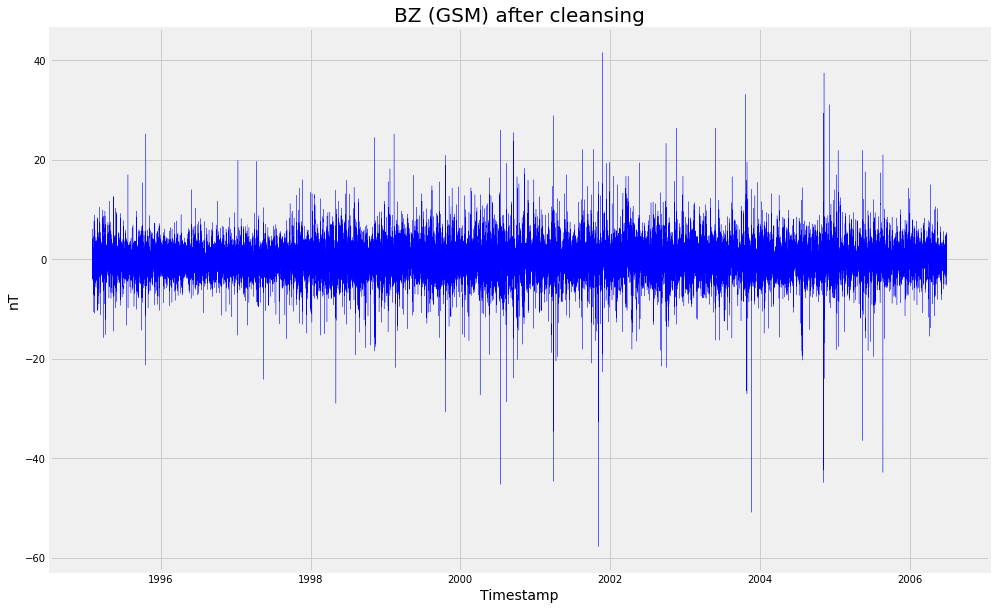

In [51]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['BZ, nT (GSM)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('BZ (GSM) after cleansing', fontsize=20)

In [52]:
df_0['BZ, nT (GSM)'].describe()

count    99655.000000
mean        -0.108391
std          3.352145
min        -57.800000
25%         -1.700000
50%         -0.100000
75%          1.500000
max         41.600000
Name: BZ, nT (GSM), dtype: float64

## 2.8.- RMS magnitude B

Text(0.5, 1.0, 'RMS_magnitude')

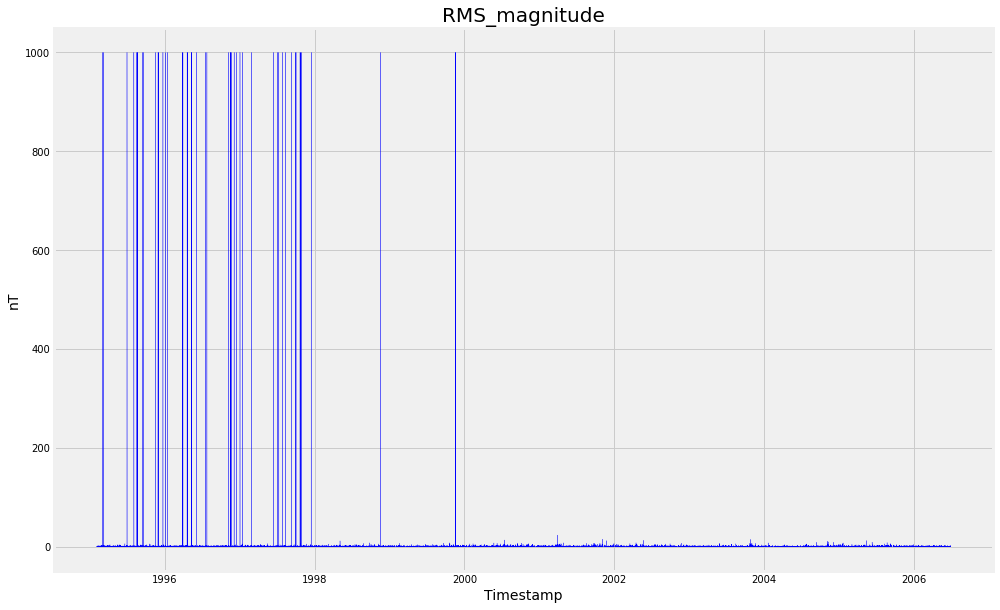

In [53]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_magnitude, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_magnitude', fontsize=20)

In [54]:
df_0['RMS_magnitude, nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [55]:
df_0['RMS_magnitude, nT'] = np.where(df_0['RMS_magnitude, nT'] >= 999.9, np.nan, df_0['RMS_magnitude, nT'])

The resulting percentage of missing values is:

In [56]:
df_0['RMS_magnitude, nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'RMS_magnitude after cleansing')

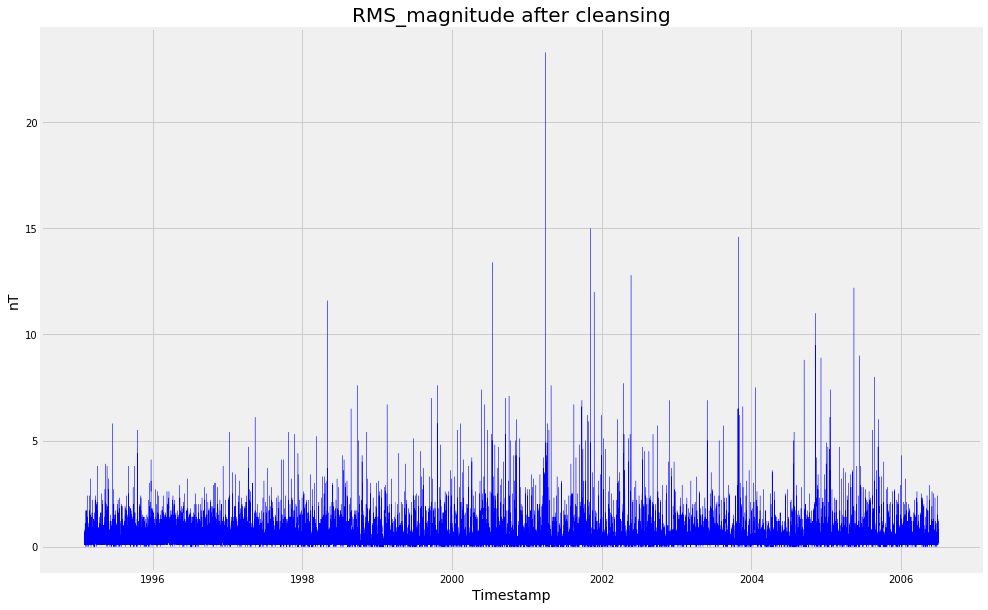

In [57]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_magnitude, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_magnitude after cleansing', fontsize=20)

In [58]:
df_0['RMS_magnitude, nT'].describe()

count    99655.000000
mean         0.388580
std          0.484608
min          0.000000
25%          0.100000
50%          0.300000
75%          0.500000
max         23.300000
Name: RMS_magnitude, nT, dtype: float64

## 2.9.- RMS B field vector

Text(0.5, 1.0, 'RMS_field_vector,')

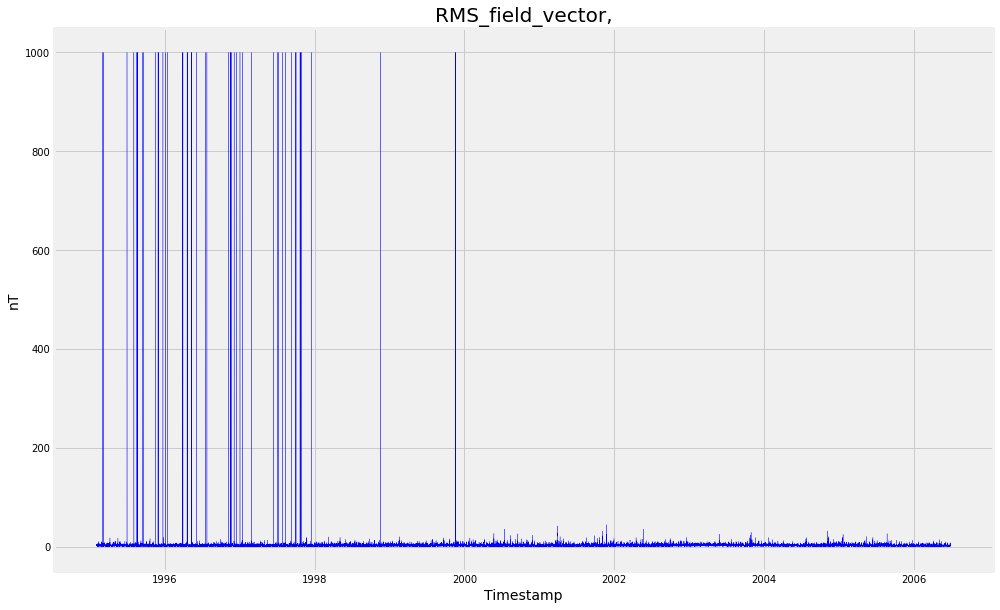

In [59]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_field_vector, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_field_vector,', fontsize=20)

In [60]:
df_0['RMS_field_vector, nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [61]:
df_0['RMS_field_vector, nT'] = np.where(df_0['RMS_field_vector, nT'] >= 982.66, np.nan, df_0['RMS_field_vector, nT'])

The resulting percentage of missing values is:

In [62]:
df_0['RMS_field_vector, nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'RMS_field_vector after cleansing')

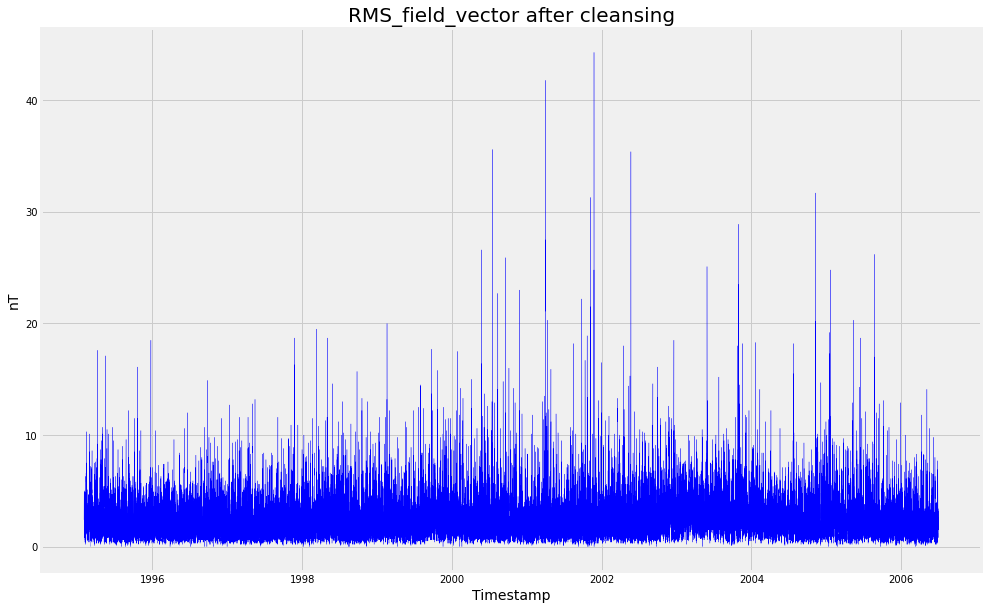

In [63]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_field_vector, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_field_vector after cleansing', fontsize=20)

In [64]:
df_0['RMS_field_vector, nT'].describe()

count    99655.000000
mean         2.345672
std          1.703196
min          0.000000
25%          1.200000
50%          2.000000
75%          3.000000
max         44.300000
Name: RMS_field_vector, nT, dtype: float64

## 2.10.- RMS BX GSE

Text(0.5, 1.0, 'RMS_BX_GSE')

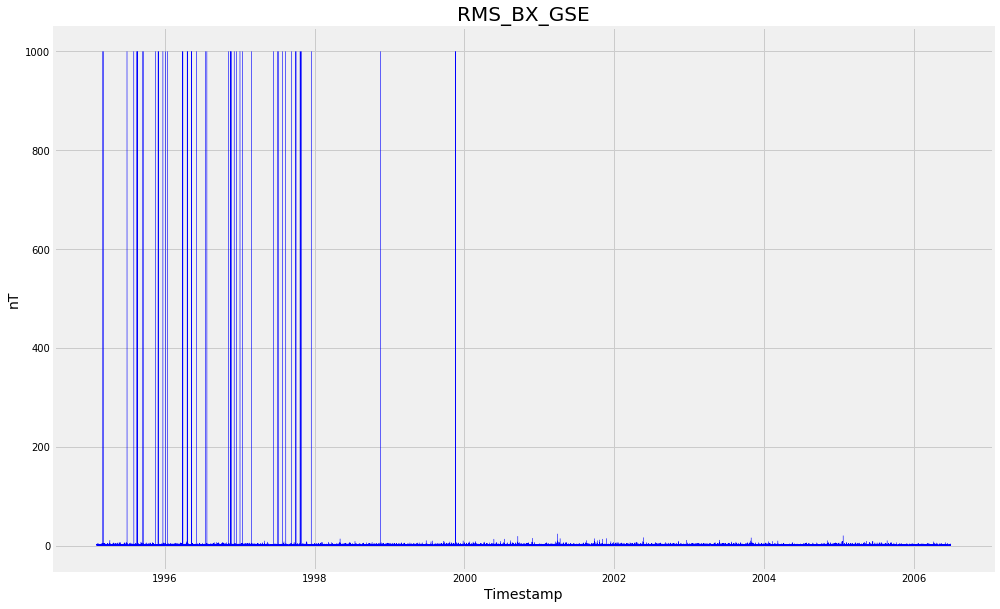

In [65]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_BX_GSE, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_BX_GSE', fontsize=20)

In [66]:
df_0['RMS_BX_GSE, nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [67]:
df_0['RMS_BX_GSE, nT'] = np.where(df_0['RMS_BX_GSE, nT'] >= 982.66, np.nan, df_0['RMS_BX_GSE, nT'])

The resulting percentage of missing values is:

In [68]:
df_0['RMS_BX_GSE, nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'RMS_BX_GSE after cleansing')

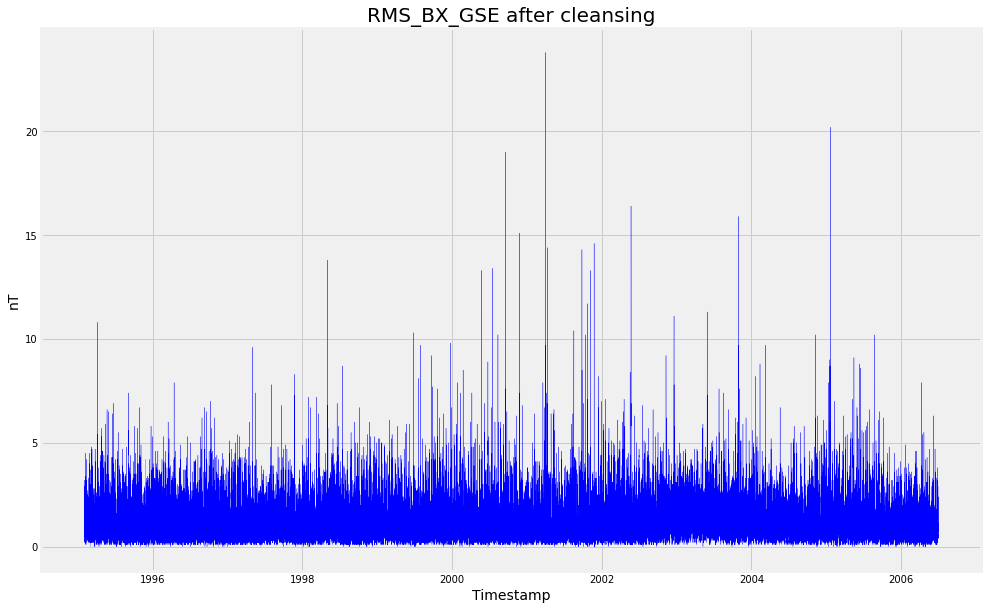

In [69]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_BX_GSE, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_BX_GSE after cleansing', fontsize=20)

In [70]:
df_0['RMS_BX_GSE, nT'].describe()

count    99655.000000
mean         1.111669
std          0.876853
min          0.000000
25%          0.500000
50%          0.900000
75%          1.500000
max         23.800000
Name: RMS_BX_GSE, nT, dtype: float64

## 2.11.- RMS BY GSE

Text(0.5, 1.0, 'RMS_BY_GSE')

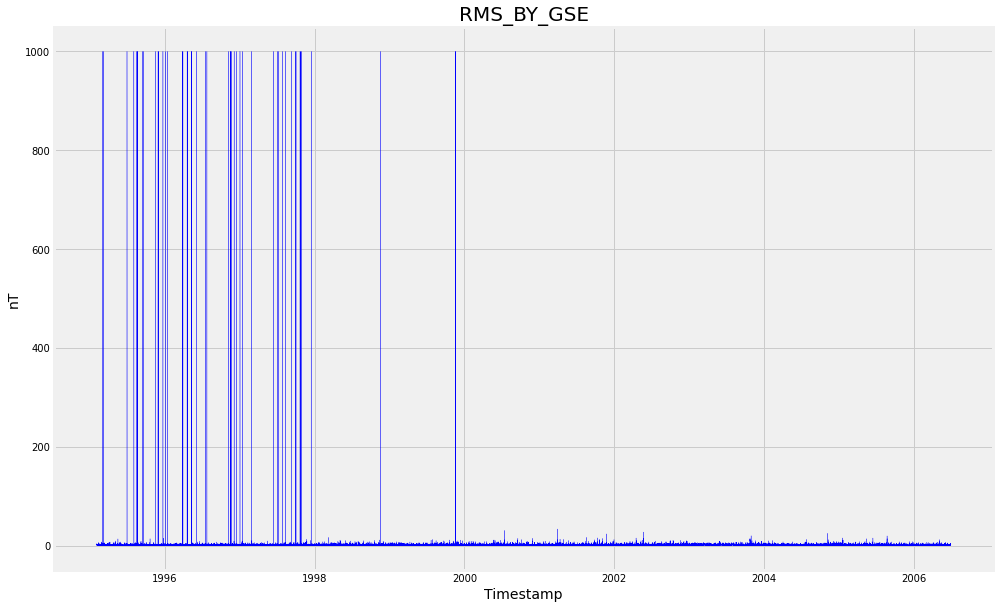

In [71]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_BY_GSE, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_BY_GSE', fontsize=20)

In [72]:
df_0['RMS_BY_GSE, nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [73]:
df_0['RMS_BY_GSE, nT'] = np.where(df_0['RMS_BY_GSE, nT'] >= 982.66, np.nan, df_0['RMS_BY_GSE, nT'])

The resulting percentage of missing values is:

In [74]:
df_0['RMS_BY_GSE, nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'RMS_BY_GSE after cleansing')

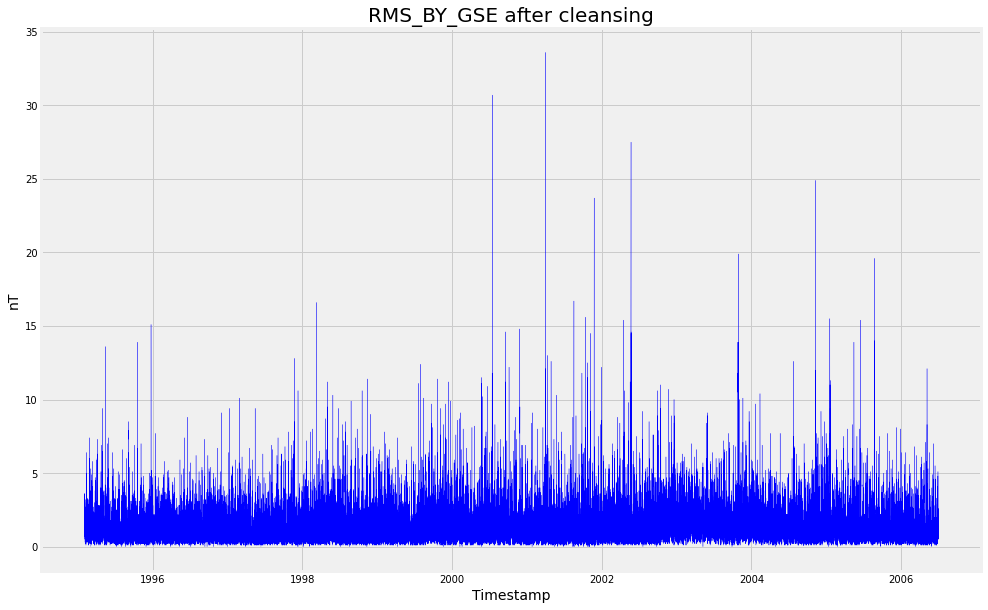

In [75]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_BY_GSE, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_BY_GSE after cleansing', fontsize=20)

In [76]:
df_0['RMS_BY_GSE, nT'].describe()

count    99655.000000
mean         1.263866
std          1.106150
min          0.000000
25%          0.600000
50%          1.000000
75%          1.600000
max         33.600000
Name: RMS_BY_GSE, nT, dtype: float64

## 2.12.- RMS BZ GSE

Text(0.5, 1.0, 'RMS_BZ_GSE')

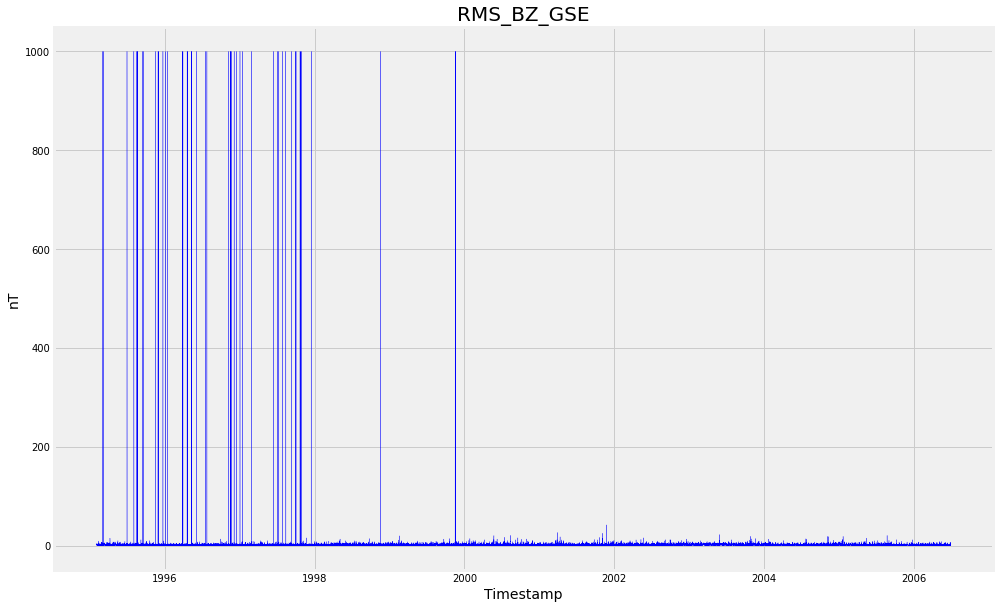

In [77]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_BZ_GSE, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_BZ_GSE', fontsize=20)

In [78]:
df_0['RMS_BZ_GSE, nT'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [79]:
df_0['RMS_BZ_GSE, nT'] = np.where(df_0['RMS_BZ_GSE, nT'] >= 982.66, np.nan, df_0['RMS_BZ_GSE, nT'])

The resulting percentage of missing values is:

In [80]:
df_0['RMS_BZ_GSE, nT'].isna().sum()*100/df_0.shape[0]

0.3768793985924504

Text(0.5, 1.0, 'RMS_BZ_GSE after cleansing')

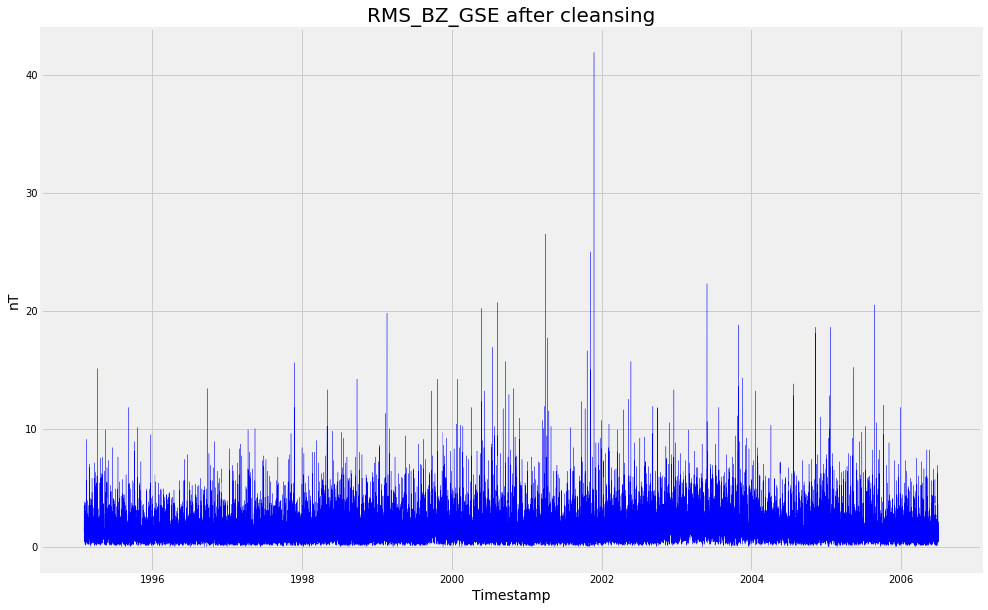

In [81]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['RMS_BZ_GSE, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('RMS_BZ_GSE after cleansing', fontsize=20)

In [82]:
df_0['RMS_BZ_GSE, nT'].describe()

count    99655.000000
mean         1.447275
std          1.218520
min          0.000000
25%          0.700000
50%          1.100000
75%          1.900000
max         41.900000
Name: RMS_BZ_GSE, nT, dtype: float64

## 2.13.- SW Plasma Temperature

Text(0.5, 1.0, 'SW Plasma Temperature')

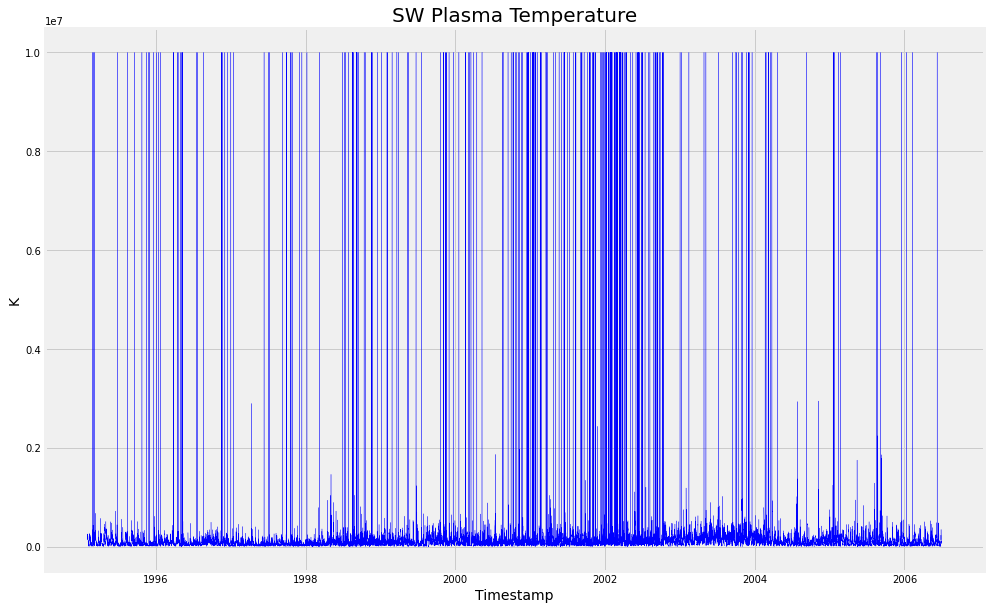

In [83]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['SW Plasma Temperature, K'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('K', fontsize=14)
plt.title('SW Plasma Temperature', fontsize=20)

In [84]:
df_0['SW Plasma Temperature, K'].max()

9999999

DataRobot identified outliers in this feature with a value of 9999999

We will replace outliers with nans

In [85]:
df_0['SW Plasma Temperature, K'] = np.where(df_0['SW Plasma Temperature, K'] >= 9999999, np.nan, df_0['SW Plasma Temperature, K'])

The resulting percentage of missing values is:

In [86]:
df_0['SW Plasma Temperature, K'].isna().sum()*100/df_0.shape[0]

4.361604286628279

Text(0.5, 1.0, 'SW Plasma Temperature after cleansing')

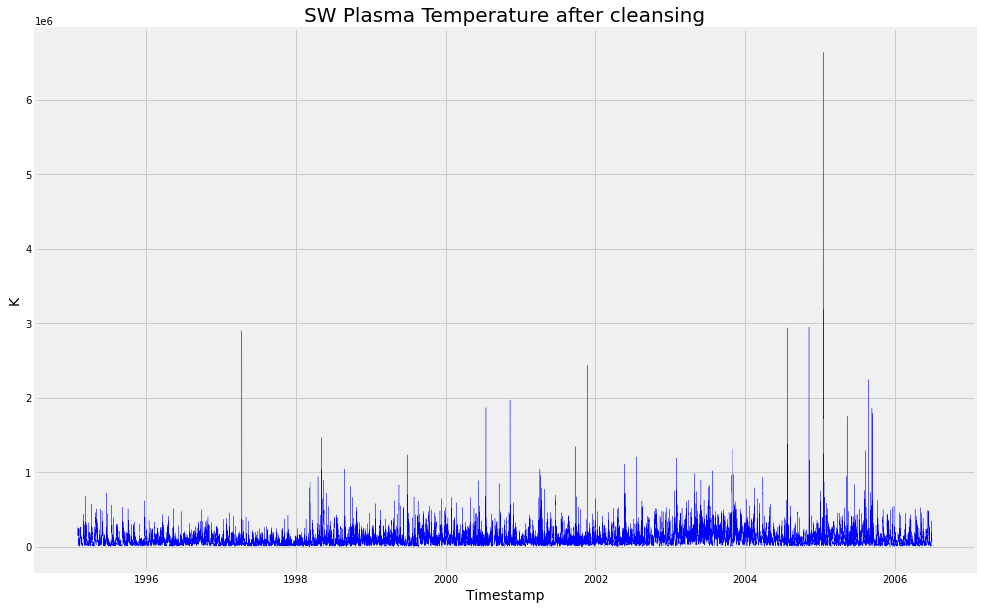

In [87]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['SW Plasma Temperature, K'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('K', fontsize=14)
plt.title('SW Plasma Temperature after cleansing', fontsize=20)

In [88]:
df_0['SW Plasma Temperature, K'].describe()

count    9.566900e+04
mean     1.062765e+05
std      1.057477e+05
min      3.450000e+03
25%      4.217100e+04
50%      7.908700e+04
75%      1.395030e+05
max      6.632456e+06
Name: SW Plasma Temperature, K, dtype: float64

## 2.14.- SW Proton Density

Text(0.5, 1.0, 'SW Proton Density')

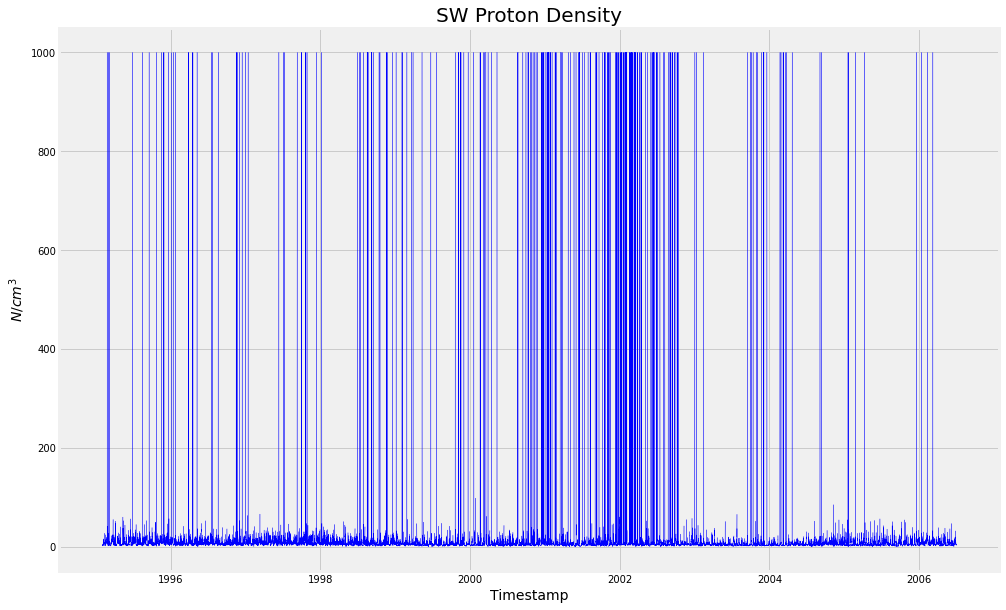

In [89]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['SW Proton Density, N/cm^3'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('$N/cm^3$', fontsize=14)
plt.title('SW Proton Density', fontsize=20)

In [90]:
df_0['SW Proton Density, N/cm^3'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [91]:
df_0['SW Proton Density, N/cm^3'] = np.where(df_0['SW Proton Density, N/cm^3'] >= 982.66, np.nan, df_0['SW Proton Density, N/cm^3'])

The resulting percentage of missing values is:

In [92]:
df_0['SW Proton Density, N/cm^3'].isna().sum()*100/df_0.shape[0]

4.367602367242482

Text(0.5, 1.0, 'SW Proton Density after cleansing')

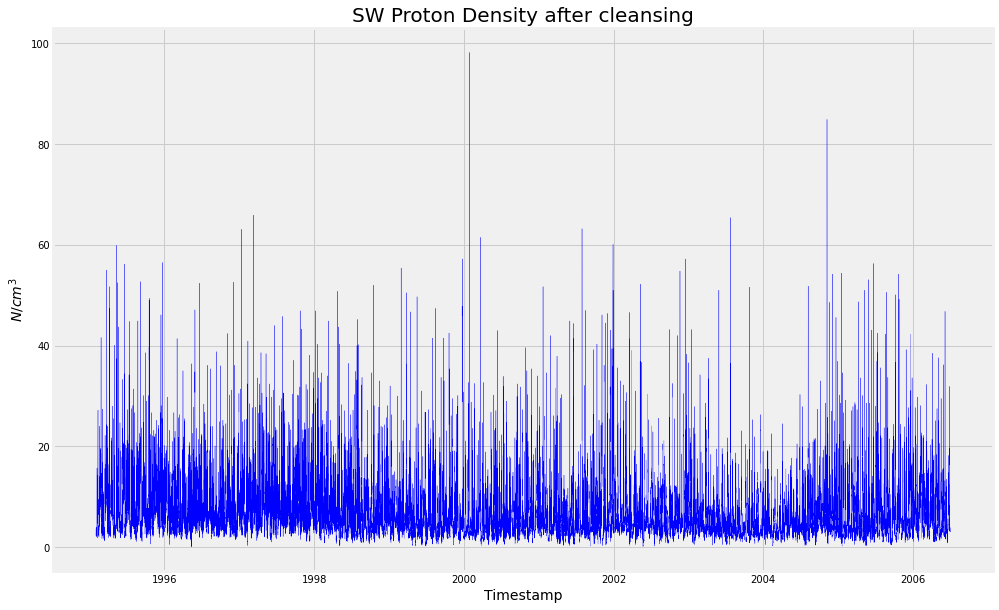

In [93]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['SW Proton Density, N/cm^3'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('$N/cm^3$', fontsize=14)
plt.title('SW Proton Density after cleansing', fontsize=20)

In [94]:
df_0['SW Proton Density, N/cm^3'].describe()

count    95663.000000
mean         6.590874
std          5.272860
min          0.100000
25%          3.300000
50%          5.000000
75%          8.200000
max         98.200000
Name: SW Proton Density, N/cm^3, dtype: float64

## 2.15.- SW Plasma Speed

Text(0.5, 1.0, 'SW Plasma Speed')

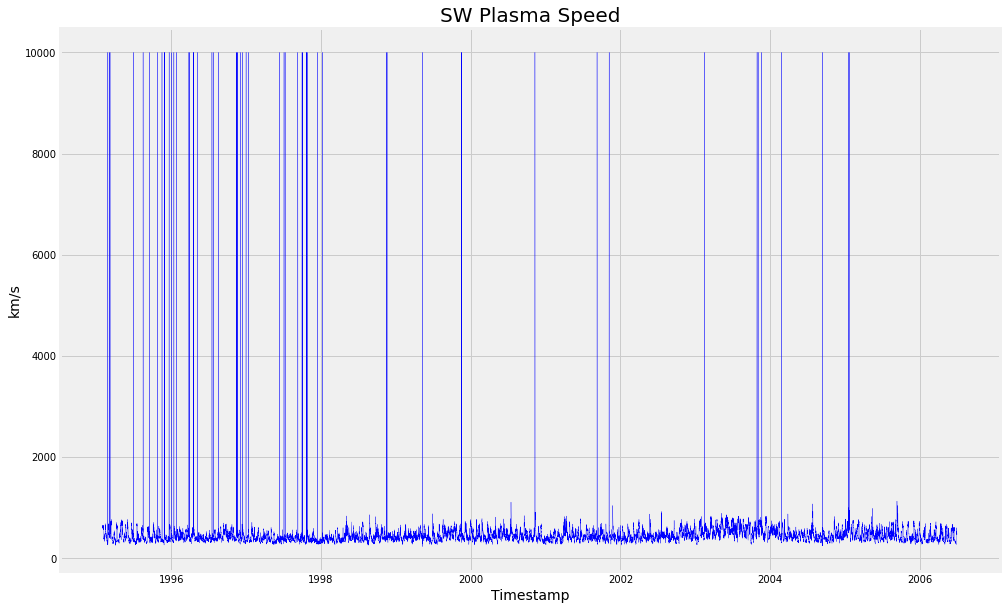

In [95]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['SW Plasma Speed, km/s'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('km/s', fontsize=14)
plt.title('SW Plasma Speed', fontsize=20)

In [96]:
df_0['SW Plasma Speed, km/s'].max()

9999

DataRobot identified outliers in this feature with a value of 9999

We will replace outliers with nans

In [97]:
df_0['SW Plasma Speed, km/s'] = np.where(df_0['SW Plasma Speed, km/s'] >= 9999, np.nan, df_0['SW Plasma Speed, km/s'])

The resulting percentage of missing values is:

In [98]:
df_0['SW Plasma Speed, km/s'].isna().sum()*100/df_0.shape[0]

0.5638195777351248

Text(0.5, 1.0, 'SW Plasma Speed after cleansing')

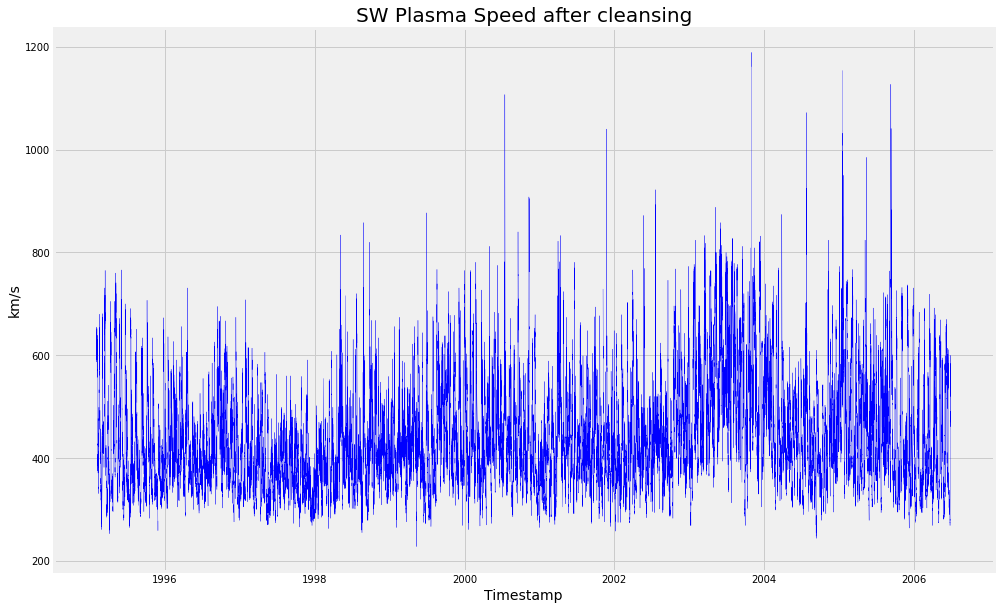

In [99]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['SW Plasma Speed, km/s'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('km/s', fontsize=14)
plt.title('SW Plasma Speed after cleansing', fontsize=20)

In [100]:
df_0['SW Plasma Speed, km/s'].describe()

count    99468.000000
mean       441.040174
std        104.674203
min        228.000000
25%        365.000000
50%        417.000000
75%        496.000000
max       1189.000000
Name: SW Plasma Speed, km/s, dtype: float64

## 2.16.- Alpha/Proton ratio

Text(0.5, 1.0, 'Alpha/Prot. ratio')

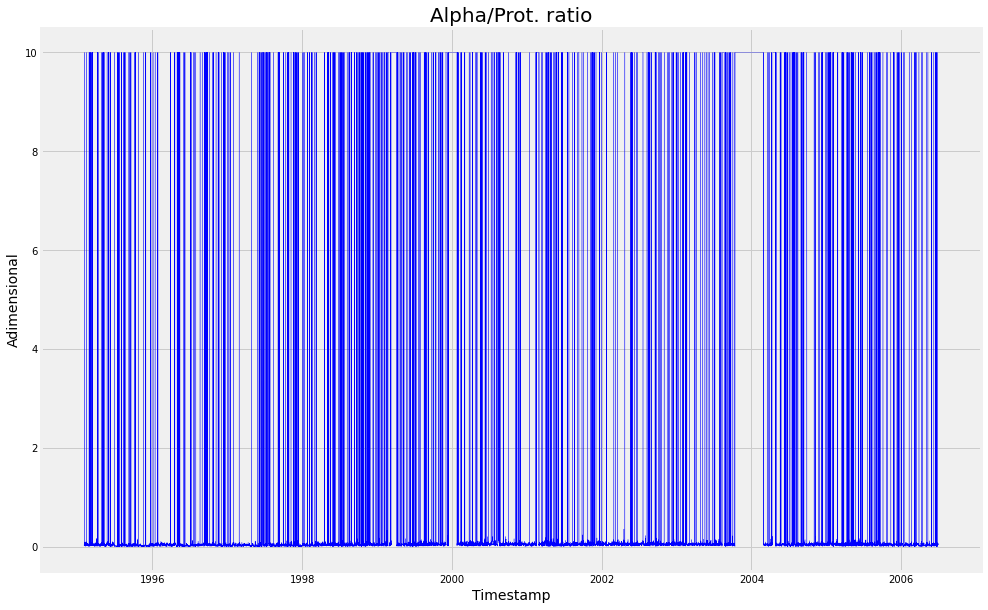

In [101]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Alpha/Prot. ratio'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Adimensional', fontsize=14)
plt.title('Alpha/Prot. ratio', fontsize=20)

In [102]:
df_0['Alpha/Prot. ratio'].max()

9.999

DataRobot identified outliers in this feature with a value of 9.9

We will replace outliers with nans

In [103]:
df_0['Alpha/Prot. ratio'] = np.where(df_0['Alpha/Prot. ratio'] >= 9.9, np.nan, df_0['Alpha/Prot. ratio'])

The resulting percentage of missing values is:

In [104]:
df_0['Alpha/Prot. ratio'].isna().sum()*100/df_0.shape[0]

12.205094369801664

Text(0.5, 1.0, 'Alpha/Prot. ratio after cleansing')

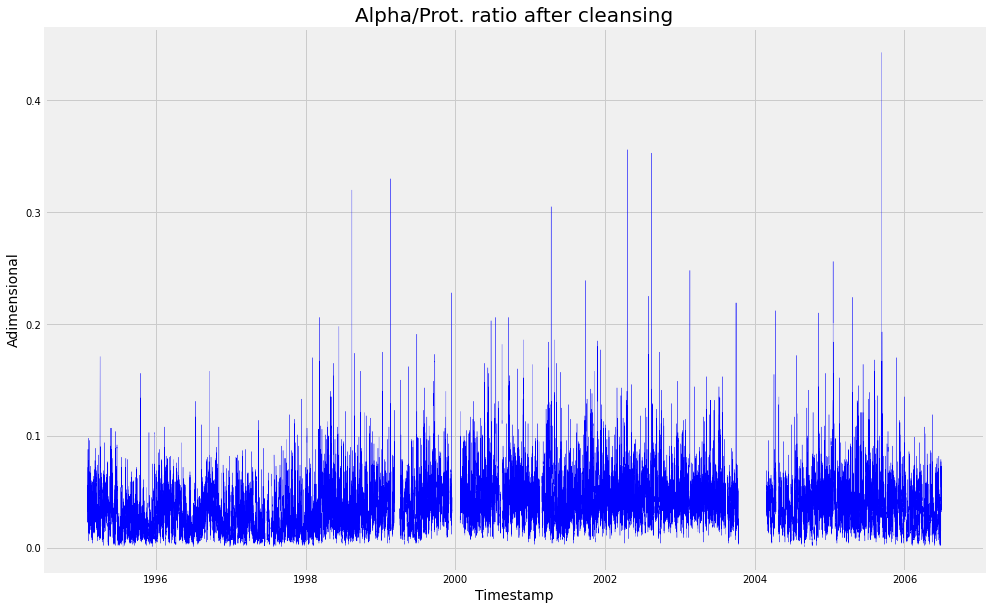

In [105]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Alpha/Prot. ratio'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Adimensional', fontsize=14)
plt.title('Alpha/Prot. ratio after cleansing', fontsize=20)

In [106]:
df_0['Alpha/Prot. ratio'].describe()

count    87823.000000
mean         0.037428
std          0.021379
min          0.001000
25%          0.023000
50%          0.035000
75%          0.048000
max          0.443000
Name: Alpha/Prot. ratio, dtype: float64

## 2.17.- SW Temperature Standard Deviation 

Text(0.5, 1.0, 'sigma-T')

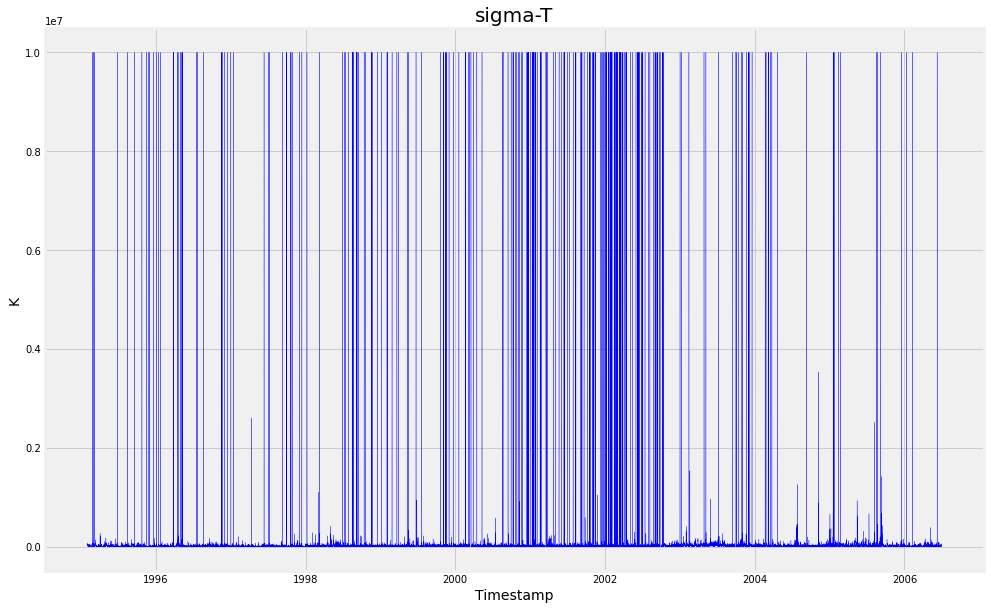

In [107]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-T,K'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('K', fontsize=14)
plt.title('sigma-T', fontsize=20)

In [108]:
df_0['sigma-T,K'].max()

9999999

DataRobot identified outliers in this feature with a value of 9999999

We will replace outliers with nans

In [109]:
df_0['sigma-T,K'] = np.where(df_0['sigma-T,K'] >= 9999999, np.nan, df_0['sigma-T,K'])

The resulting percentage of missing values is:

In [110]:
df_0['sigma-T,K'].isna().sum()*100/df_0.shape[0]

4.361604286628279

Text(0.5, 1.0, 'sigma-T after cleansing')

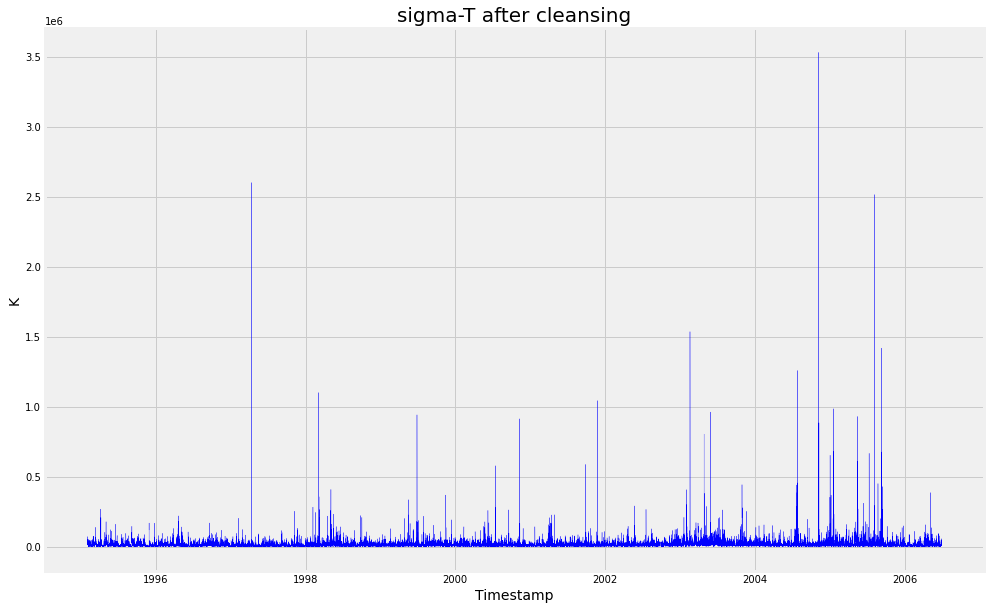

In [111]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-T,K'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('K', fontsize=14)
plt.title('sigma-T after cleansing', fontsize=20)

In [112]:
df_0['sigma-T,K'].describe()

count    9.566900e+04
mean     1.479411e+04
std      2.981022e+04
min      0.000000e+00
25%      4.878000e+03
50%      9.670000e+03
75%      1.760200e+04
max      3.532095e+06
Name: sigma-T,K, dtype: float64

## 2.18.- SW Proton Density Standard Deviation 

Text(0.5, 1.0, 'sigma-N')

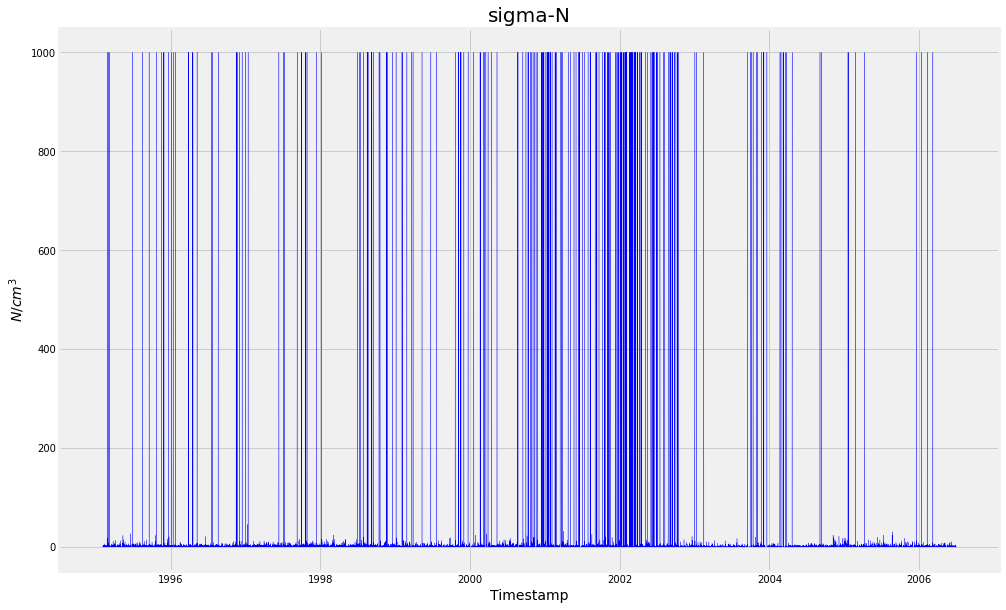

In [113]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-n, N/cm^3)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('$N/cm^3$', fontsize=14)
plt.title('sigma-N', fontsize=20)

In [114]:
df_0['sigma-n, N/cm^3)'].max()

999.9

DataRobot identified outliers in this feature with a value of 982.66

We will replace outliers with nans

In [115]:
df_0['sigma-n, N/cm^3)'] = np.where(df_0['sigma-n, N/cm^3)'] >= 982.66, np.nan, df_0['sigma-n, N/cm^3)'])

The resulting percentage of missing values is:

In [116]:
df_0['sigma-n, N/cm^3)'].isna().sum()*100/df_0.shape[0]

4.367602367242482

Text(0.5, 1.0, 'sigma-N after cleansing')

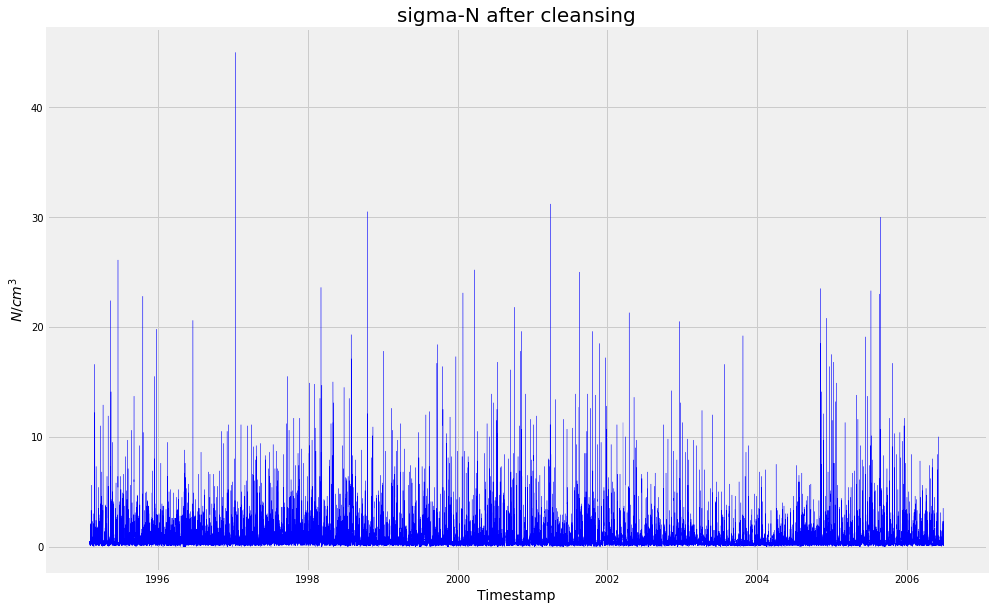

In [117]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-n, N/cm^3)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('$N/cm^3$', fontsize=14)
plt.title('sigma-N after cleansing', fontsize=20)

In [118]:
df_0['sigma-n, N/cm^3)'].describe()

count    95663.000000
mean         0.727021
std          1.118163
min          0.000000
25%          0.200000
50%          0.400000
75%          0.800000
max         45.000000
Name: sigma-n, N/cm^3), dtype: float64

## 2.19.- SW Plasma Speed Standard Deviation 

Text(0.5, 1.0, 'sigma-V')

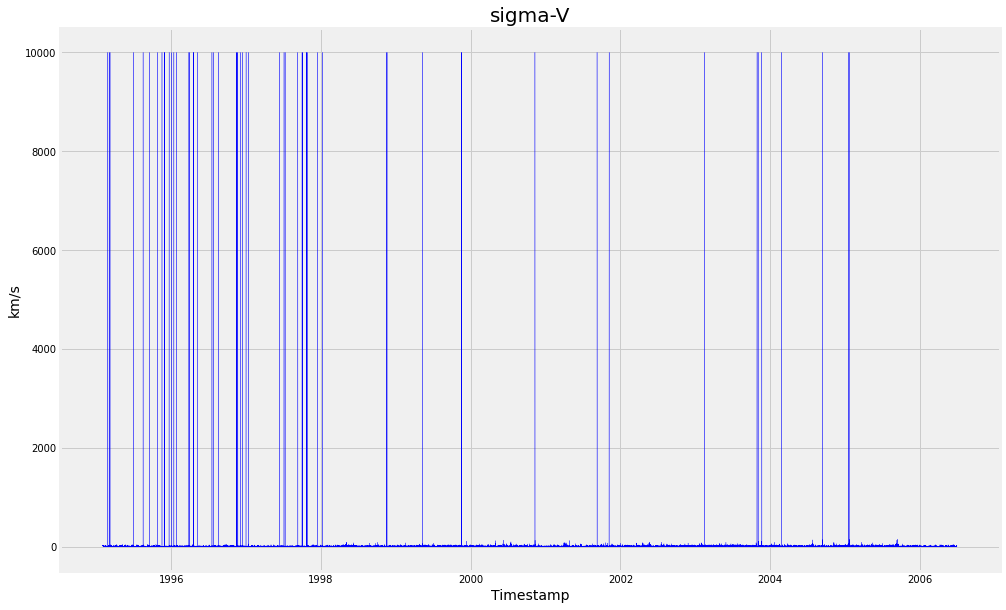

In [119]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-V, km/s'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('km/s', fontsize=14)
plt.title('sigma-V', fontsize=20)

In [120]:
df_0['sigma-V, km/s'].max()

9999

DataRobot identified outliers in this feature with a value of 9999

We will replace outliers with nans

In [121]:
df_0['sigma-V, km/s'] = np.where(df_0['sigma-V, km/s'] >= 9999, np.nan, df_0['sigma-V, km/s'])

The resulting percentage of missing values is:

In [122]:
df_0['sigma-V, km/s'].isna().sum()*100/df_0.shape[0]

0.5638195777351248

Text(0.5, 1.0, 'sigma-V')

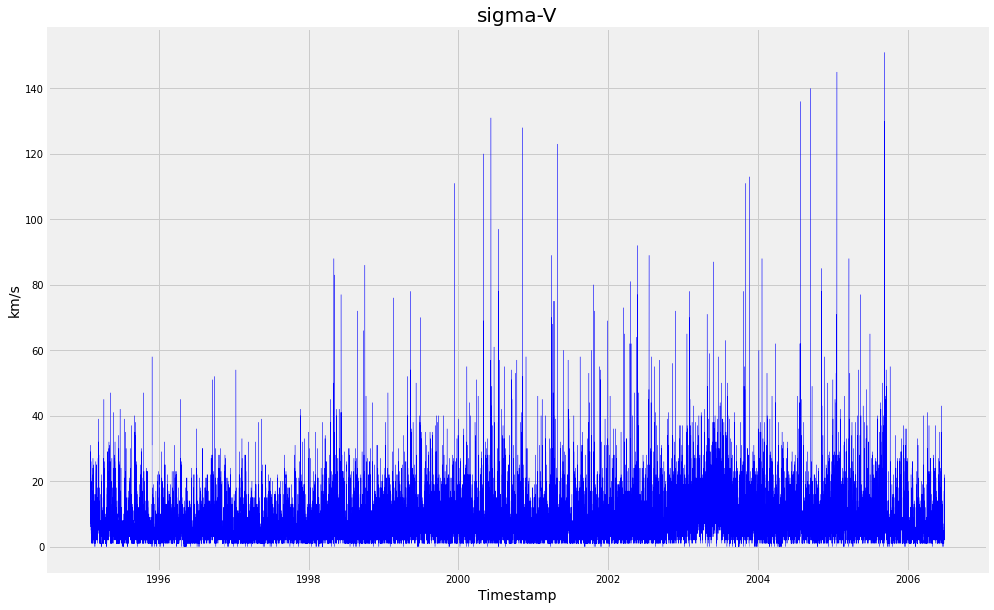

In [123]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-V, km/s'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('km/s', fontsize=14)
plt.title('sigma-V', fontsize=20)

In [124]:
df_0['sigma-V, km/s'].describe()

count    99468.000000
mean         7.183587
std          6.154236
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        151.000000
Name: sigma-V, km/s, dtype: float64

## 2.20.- Alpha/Proton Ratio Deviation 

Text(0.5, 1.0, '$\\sigma$ Alpha/Prot. ratio')

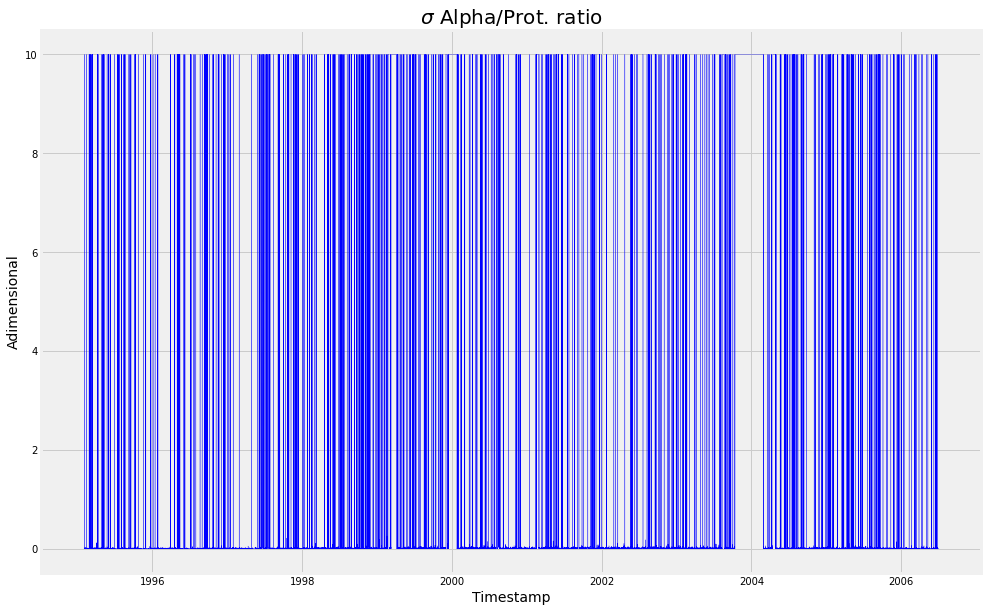

In [125]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-ratio'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Adimensional', fontsize=14)
plt.title('$\sigma$ Alpha/Prot. ratio', fontsize=20)

In [126]:
df_0['sigma-ratio'].max()

9.999

DataRobot identified outliers in this feature with a value of 9.999

We will replace outliers with nans

In [127]:
df_0['sigma-ratio'] = np.where(df_0['sigma-ratio'] >= 9.999, np.nan, df_0['sigma-ratio'])

The resulting percentage of missing values is:

In [128]:
df_0['sigma-ratio'].isna().sum()*100/df_0.shape[0]

12.205094369801664

Text(0.5, 1.0, '$\\sigma$ Alpha/Prot. ratio')

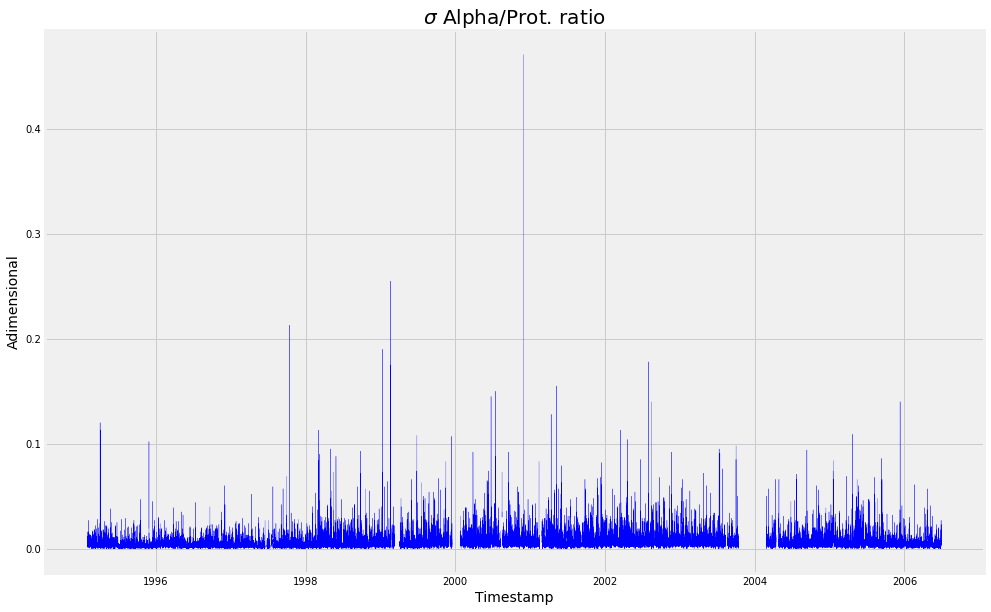

In [129]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['sigma-ratio'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Adimensional', fontsize=14)
plt.title('$\sigma$ Alpha/Prot. ratio', fontsize=20)

In [130]:
df_0['sigma-ratio'].describe()

count    87823.000000
mean         0.005847
std          0.006502
min          0.000000
25%          0.003000
50%          0.004000
75%          0.007000
max          0.471000
Name: sigma-ratio, dtype: float64

## 2.21.- Kp Index

Text(0.5, 1.0, 'Kp')

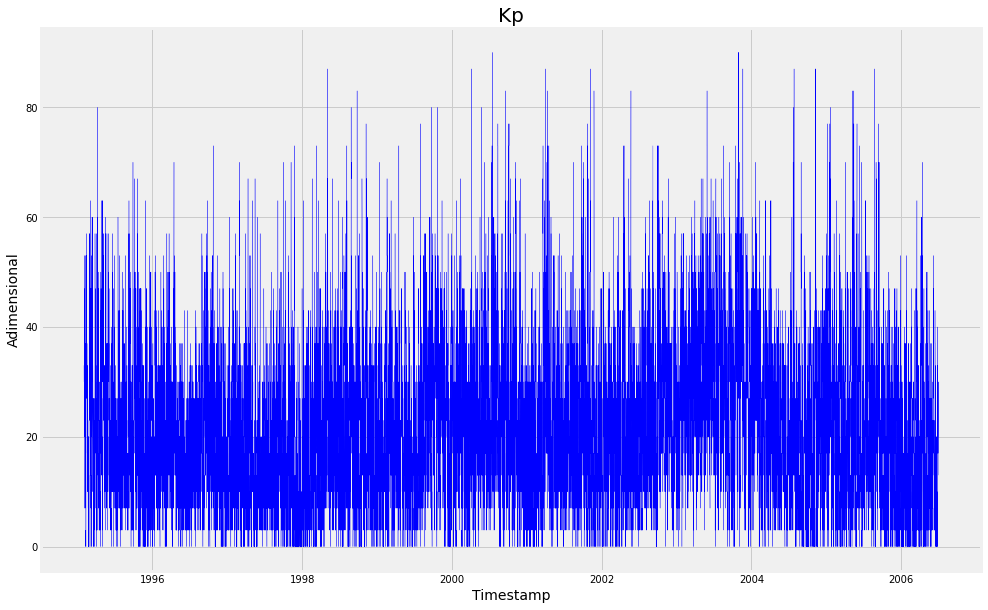

In [131]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Kp index'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Adimensional', fontsize=14)
plt.title('Kp', fontsize=20)

In [132]:
df_0['Kp index'].describe()

count    100032.000000
mean         21.459813
std          14.126796
min           0.000000
25%          10.000000
50%          20.000000
75%          30.000000
max          90.000000
Name: Kp index, dtype: float64

No issues found in this feature

## 2.22.- R (Sunspot Number)

Text(0.5, 1.0, 'R')

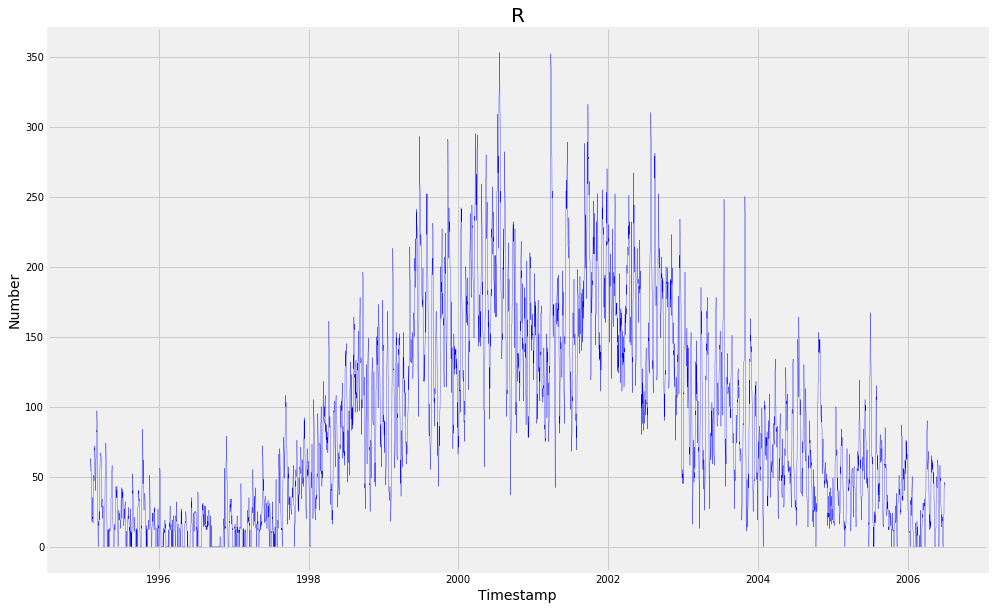

In [133]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['R (Sunspot No.)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title('R', fontsize=20)

In [134]:
df_0['R (Sunspot No.)'].describe()

count    100032.000000
mean         89.262476
std          71.543056
min           0.000000
25%          27.000000
50%          72.000000
75%         141.000000
max         353.000000
Name: R (Sunspot No.), dtype: float64

No issues found in this feature

## 2.23.- DST Index

Text(0.5, 1.0, 'DST Index')

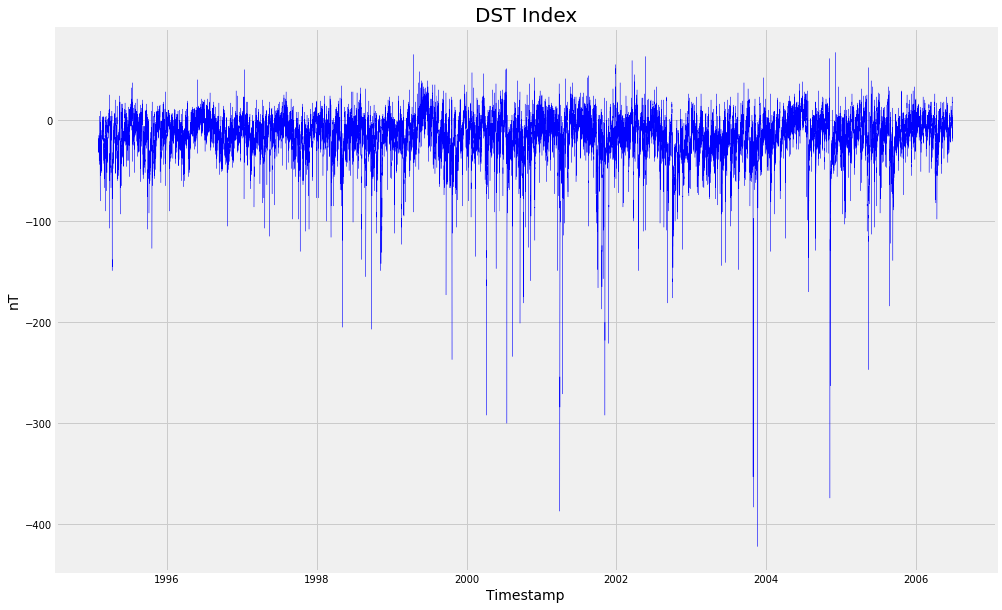

In [135]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Dst-index, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('DST Index', fontsize=20)

In [136]:
df_0['Dst-index, nT'].describe()

count    100032.000000
mean        -15.990693
std          23.593301
min        -422.000000
25%         -25.000000
50%         -12.000000
75%          -2.000000
max          67.000000
Name: Dst-index, nT, dtype: float64

No issues found in this feature

## 2.24.- $a_p$ Index

Text(0.5, 1.0, '$a_p$ Index')

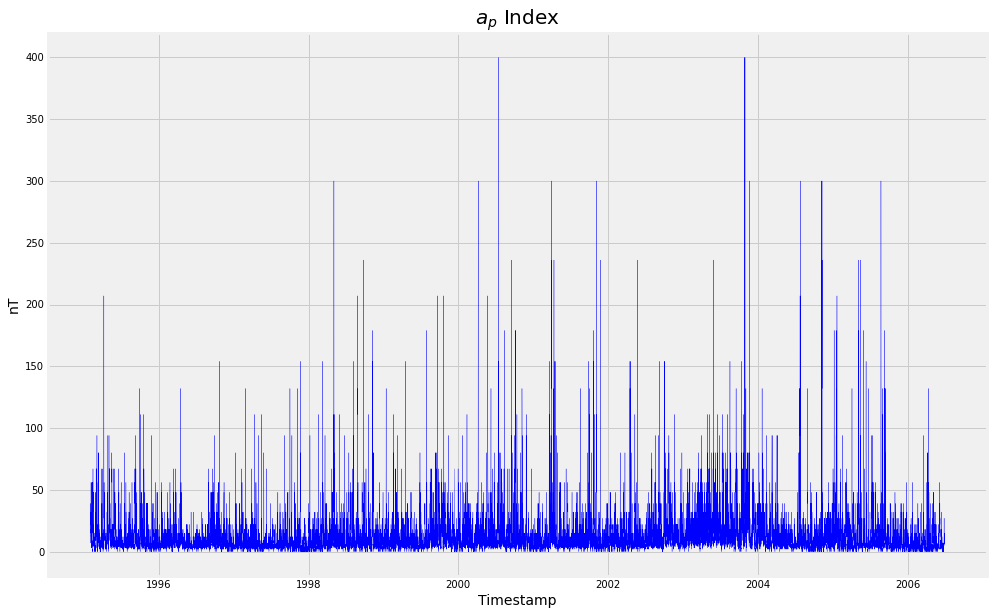

In [137]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['ap_index, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('$a_p$ Index', fontsize=20)

In [138]:
df_0['ap_index, nT'].describe()

count    100032.000000
mean         12.902951
std          19.366426
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max         400.000000
Name: ap_index, nT, dtype: float64

No issues found in this feature

## 2.25.- f10.7 Index

Text(0.5, 1.0, 'f10.7 Index')

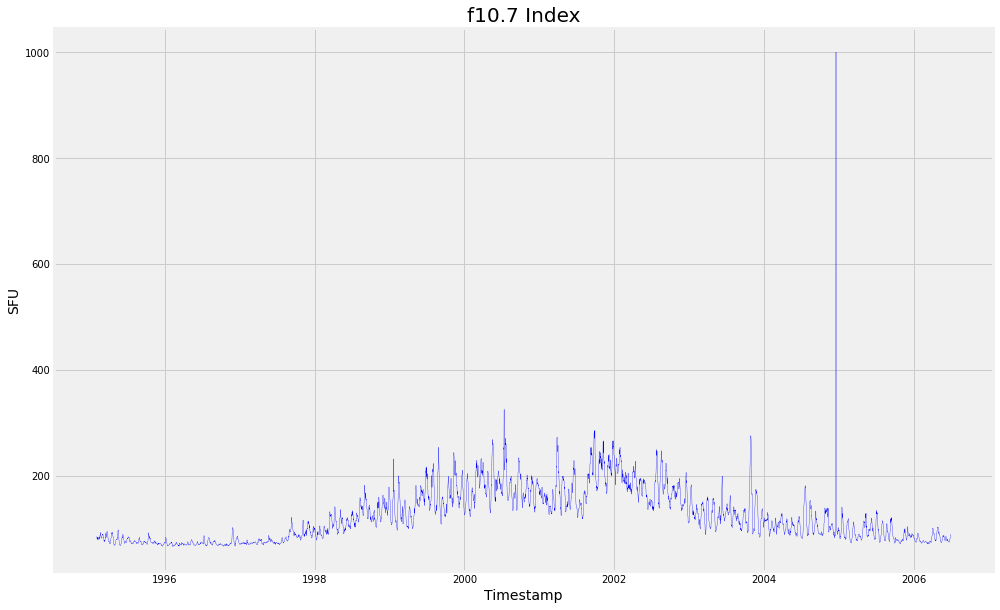

In [139]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['f10.7_index'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('SFU', fontsize=14)
plt.title('f10.7 Index', fontsize=20)

In [140]:
df_0['f10.7_index'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [141]:
df_0['f10.7_index'] = np.where(df_0['f10.7_index'] >= 999.9, np.nan, df_0['f10.7_index'])

The resulting percentage of missing values is:

In [142]:
df_0['f10.7_index'].isna().sum()*100/df_0.shape[0]

0.1199616122840691

Text(0.5, 1.0, 'f10.7 Index after cleansing')

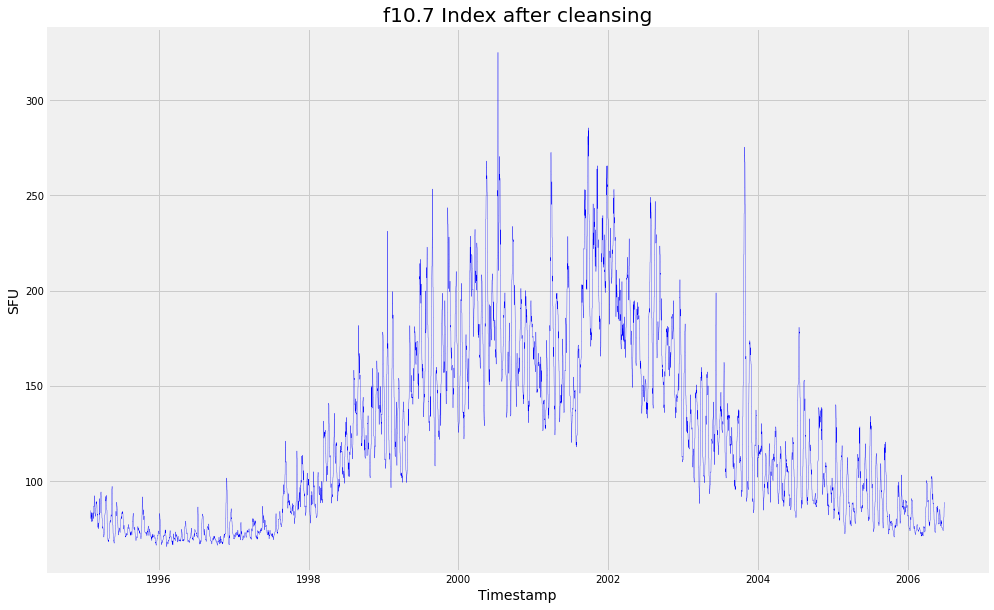

In [143]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['f10.7_index'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('SFU', fontsize=14)
plt.title('f10.7 Index after cleansing', fontsize=20)

In [144]:
df_0['f10.7_index'].describe()

count    99912.000000
mean       122.931828
std         47.446763
min         65.700000
25%         80.900000
50%        111.700000
75%        156.100000
max        325.100000
Name: f10.7_index, dtype: float64

## 2.26.- AE Index

Text(0.5, 1.0, 'AE Index')

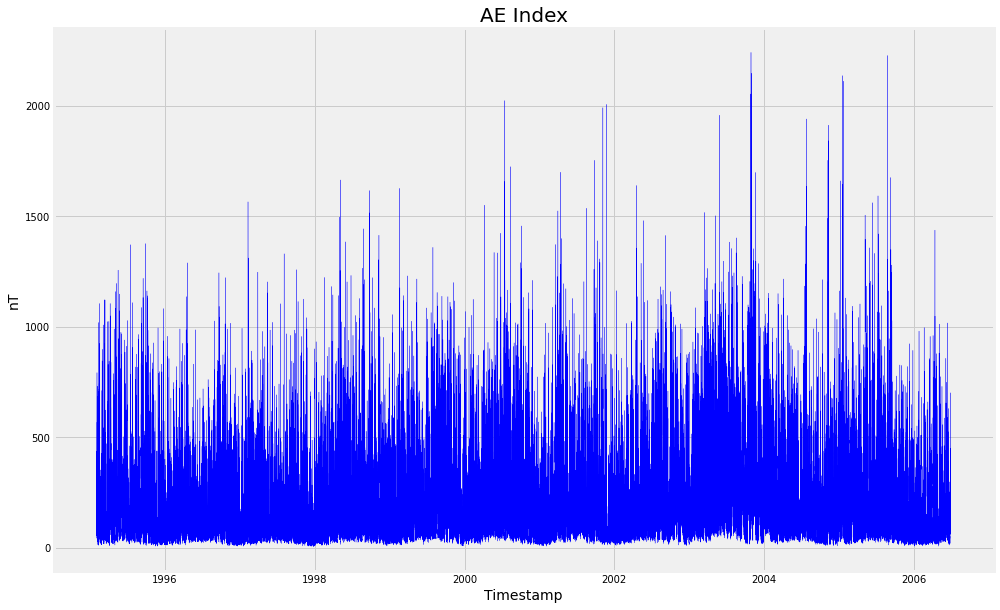

In [145]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['AE-index, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('AE Index', fontsize=20)

In [146]:
df_0['AE-index, nT'].describe()

count    100032.000000
mean        213.929413
std         214.612022
min           5.000000
25%          59.000000
50%         133.000000
75%         300.000000
max        2241.000000
Name: AE-index, nT, dtype: float64

No issues found in this feature

## 2.27.- AL Index

Text(0.5, 1.0, 'AL Index')

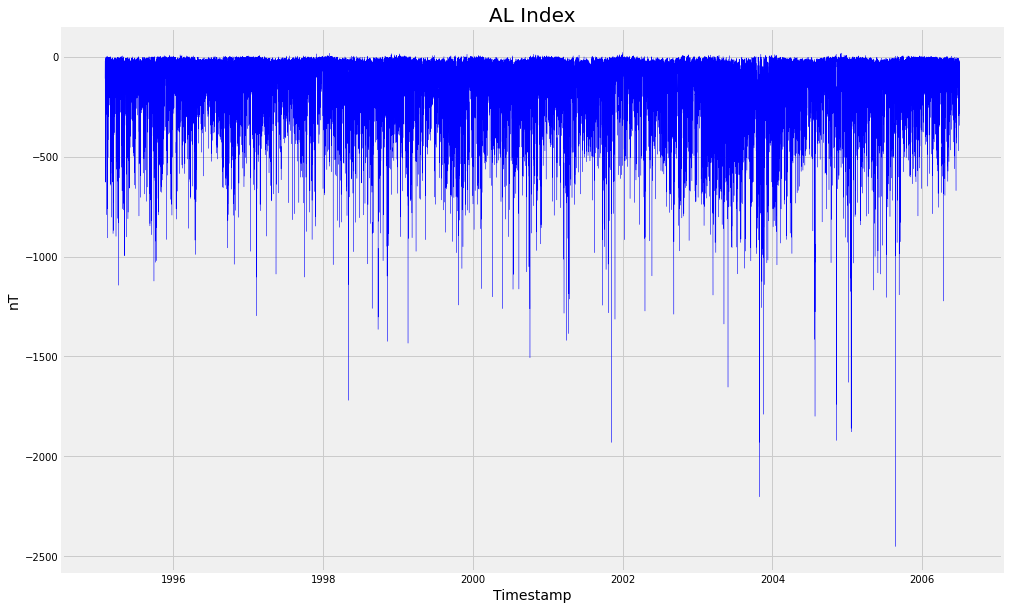

In [147]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['AL-index, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('AL Index', fontsize=20)

In [148]:
df_0['AL-index, nT'].describe()

count    100032.000000
mean       -132.136626
std         156.462099
min       -2452.000000
25%        -186.000000
50%         -70.000000
75%         -26.000000
max          22.000000
Name: AL-index, nT, dtype: float64

No issues found in this feature

## 2.28.- AU Index

Text(0.5, 1.0, 'AU Index')

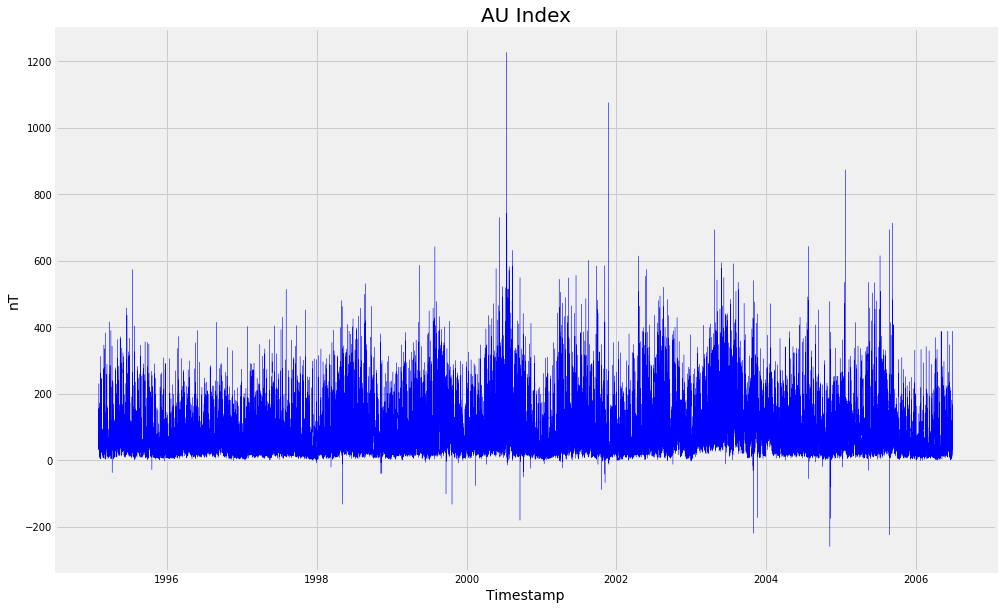

In [149]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['AU-index, nT'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('nT', fontsize=14)
plt.title('AU Index', fontsize=20)

In [150]:
df_0['AU-index, nT'].describe()

count    100032.000000
mean         81.722759
std          74.301182
min        -260.000000
25%          29.000000
50%          57.000000
75%         112.000000
max        1226.000000
Name: AU-index, nT, dtype: float64

No issues found in this feature

## 2.29.- $p_c$ Index

Text(0.5, 1.0, '$p_c$ Index')

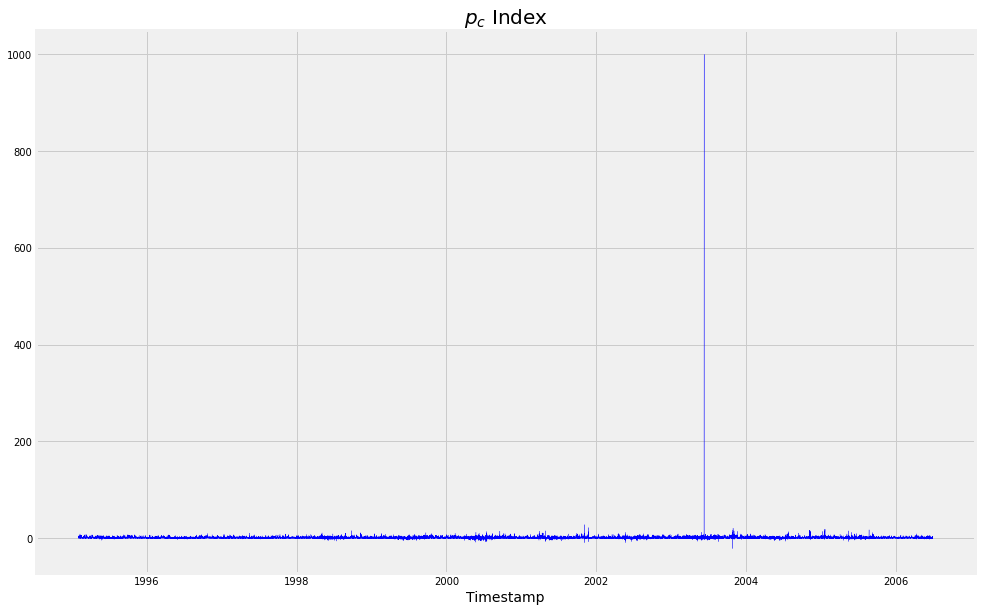

In [151]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['pc-index'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('$p_c$ Index', fontsize=20)

In [152]:
df_0['pc-index'].max()

999.9

DataRobot identified outliers in this feature with a value of 999.9

We will replace outliers with nans

In [153]:
df_0['pc-index'] = np.where(df_0['pc-index'] >= 999.9, np.nan, df_0['pc-index'])

The resulting percentage of missing values is:

In [154]:
df_0['pc-index'].isna().sum()*100/df_0.shape[0]

0.024992002559181062

Text(0.5, 1.0, '$p_c$ Index after cleansing')

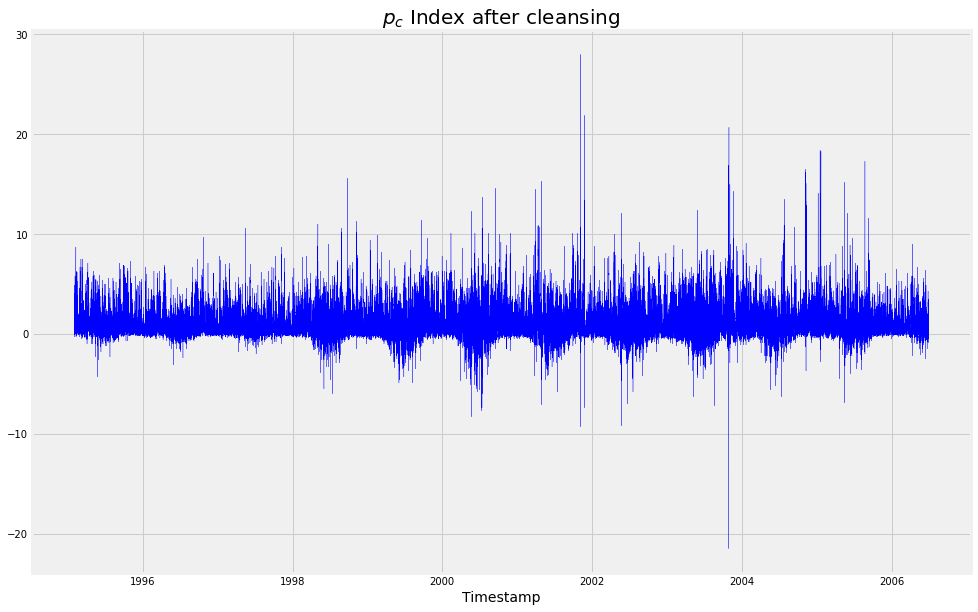

In [155]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['pc-index'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('$p_c$ Index after cleansing', fontsize=20)

In [156]:
df_0['pc-index'].describe()

count    100007.000000
mean          1.085791
std           1.471776
min         -21.500000
25%           0.100000
50%           0.700000
75%           1.700000
max          28.000000
Name: pc-index, dtype: float64

## 2.30.- Lyman Alpha

Text(0.5, 1.0, 'Lyman Alpha')

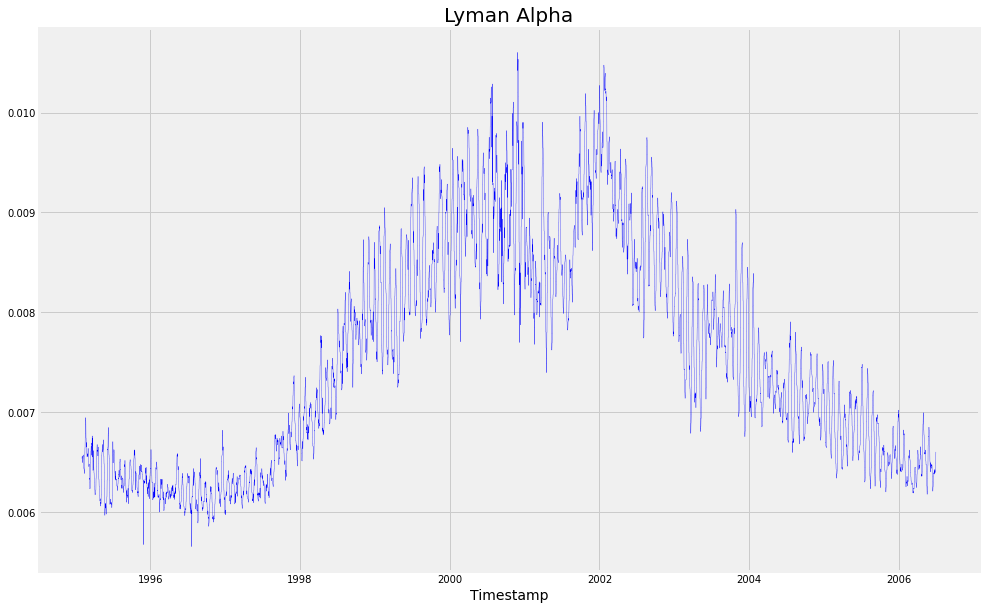

In [157]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Lyman_alpha'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Lyman Alpha', fontsize=20)

In [158]:
df_0['Lyman_alpha'].describe()

count    100032.000000
mean          0.007536
std           0.001107
min           0.005654
25%           0.006511
50%           0.007347
75%           0.008427
max           0.010603
Name: Lyman_alpha, dtype: float64

No issues found in this feature

## 2.31.- Proton flux (>1 Mev)

Text(0.5, 1.0, 'Proton flux (>1 Mev)')

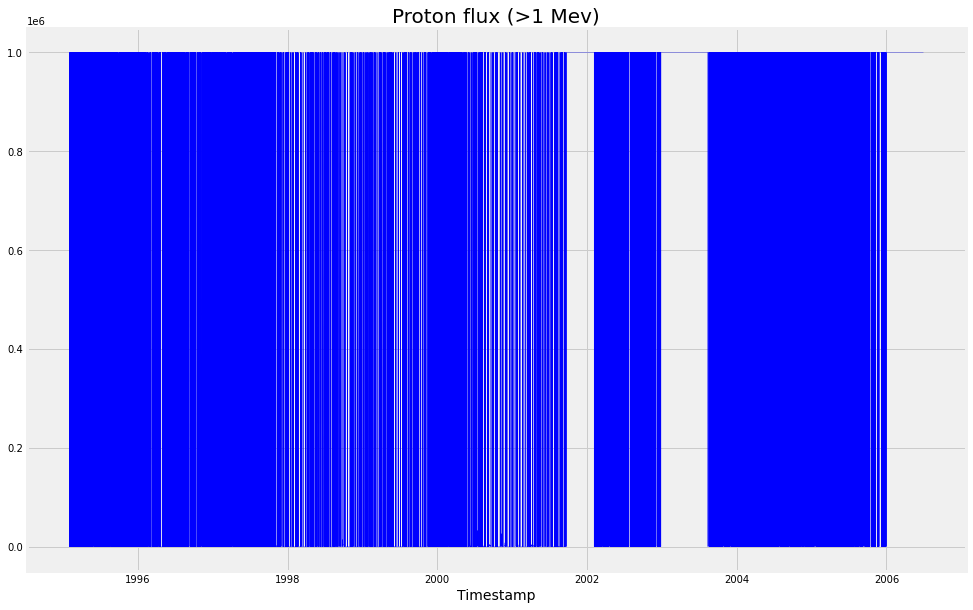

In [159]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>1 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>1 Mev)', fontsize=20)

In [160]:
df_0['Proton flux (>1 Mev)'].max()

999999.99

DataRobot identified outliers in this feature with a value of 999999.99

We will replace outliers with nans

In [161]:
df_0['Proton flux (>1 Mev)'] = np.where(df_0['Proton flux (>1 Mev)'] >= 999999.99, np.nan, df_0['Proton flux (>1 Mev)'])

The resulting percentage of missing values is:

In [162]:
df_0['Proton flux (>1 Mev)'].isna().sum()*100/df_0.shape[0]

39.70829334612924

Text(0.5, 1.0, 'Proton flux (>1 Mev) after cleansing')

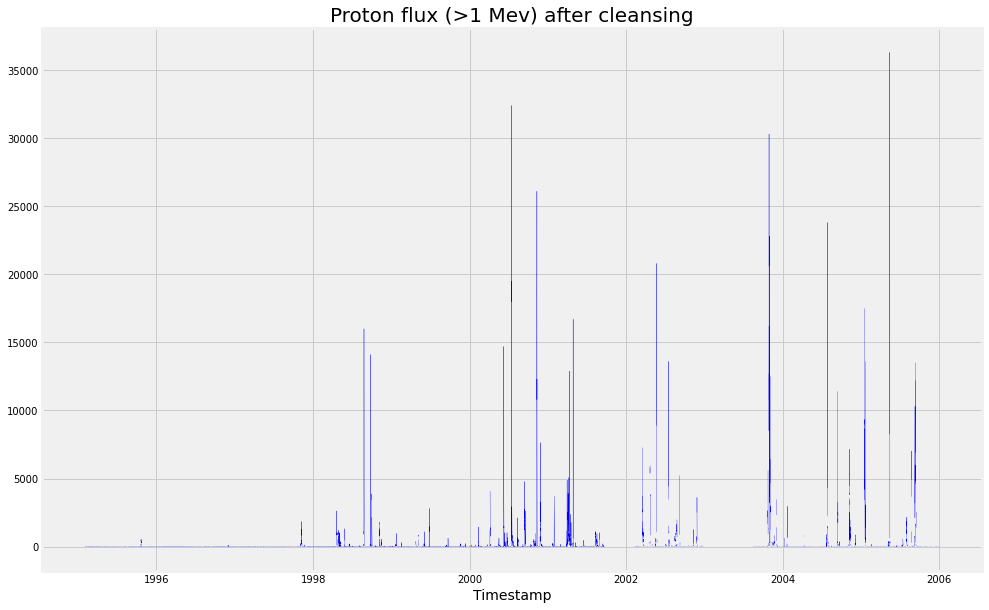

In [163]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>1 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>1 Mev) after cleansing', fontsize=20)

In [164]:
df_0['Proton flux (>1 Mev)'].describe()

count    60311.000000
mean       102.632282
std        868.231236
min          0.010000
25%          0.810000
50%          0.950000
75%          3.720000
max      36300.000000
Name: Proton flux (>1 Mev), dtype: float64

## 2.32.- Proton flux (>2 Mev)

Text(0.5, 1.0, 'Proton flux (>2 Mev)')

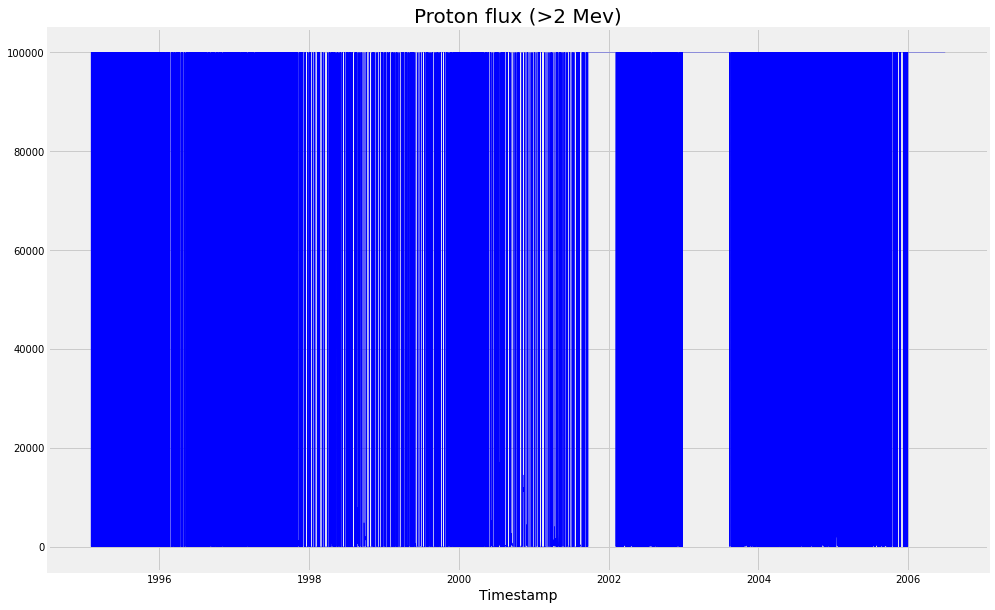

In [165]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>2 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>2 Mev)', fontsize=20)

In [166]:
df_0['Proton flux (>2 Mev)'].max()

99999.99

DataRobot identified outliers in this feature with a value of 99999.99

We will replace outliers with nans

In [167]:
df_0['Proton flux (>2 Mev)'] = np.where(df_0['Proton flux (>2 Mev)'] >= 99999.99, np.nan, df_0['Proton flux (>2 Mev)'])

The resulting percentage of missing values is:

In [168]:
df_0['Proton flux (>2 Mev)'].isna().sum()*100/df_0.shape[0]

39.713291746641076

Text(0.5, 1.0, 'Proton flux (>2 Mev) after cleansing')

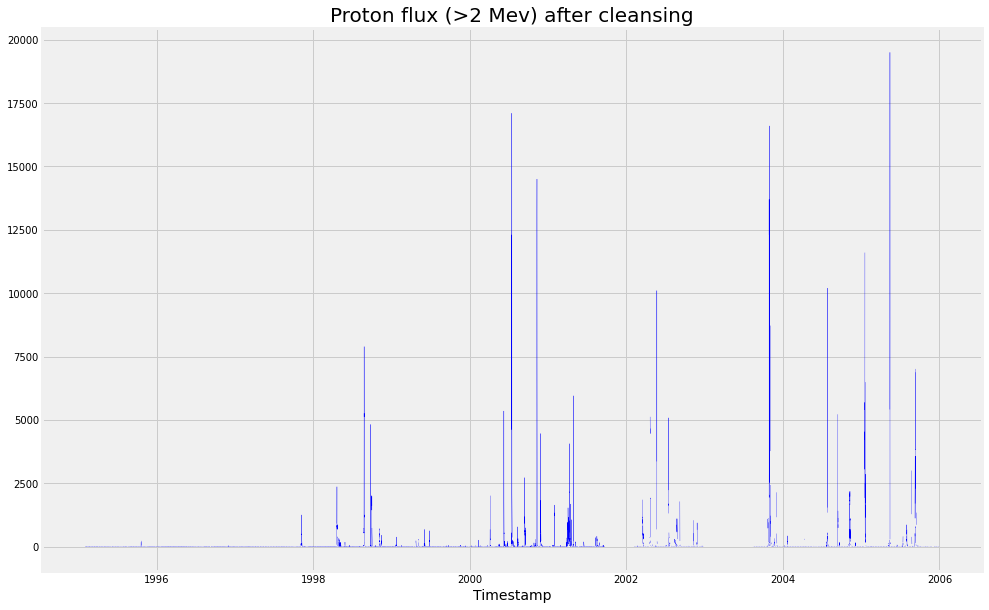

In [169]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>2 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>2 Mev) after cleansing', fontsize=20)

In [170]:
df_0['Proton flux (>2 Mev)'].describe()

count    60306.000000
mean        51.918221
std        504.331070
min          0.020000
25%          0.680000
50%          0.830000
75%          1.370000
max      19500.000000
Name: Proton flux (>2 Mev), dtype: float64

## 2.33.- Proton flux (>4 Mev)

Text(0.5, 1.0, 'Proton flux (>4 Mev)')

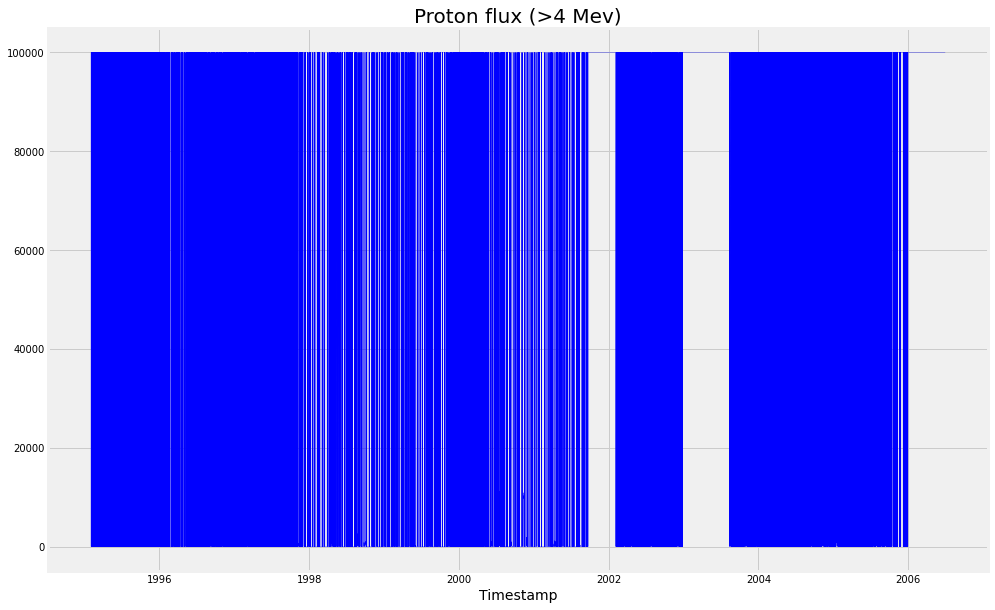

In [171]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>4 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>4 Mev)', fontsize=20)

In [172]:
df_0['Proton flux (>4 Mev)'].max()

99999.99

DataRobot identified outliers in this feature with a value of 99999.99

We will replace outliers with nans

In [173]:
df_0['Proton flux (>4 Mev)'] = np.where(df_0['Proton flux (>4 Mev)'] >= 99999.99, np.nan, df_0['Proton flux (>4 Mev)'])

The resulting percentage of missing values is:

In [174]:
df_0['Proton flux (>4 Mev)'].isna().sum()*100/df_0.shape[0]

39.71429142674344

Text(0.5, 1.0, 'Proton flux (>4 Mev) after cleansing')

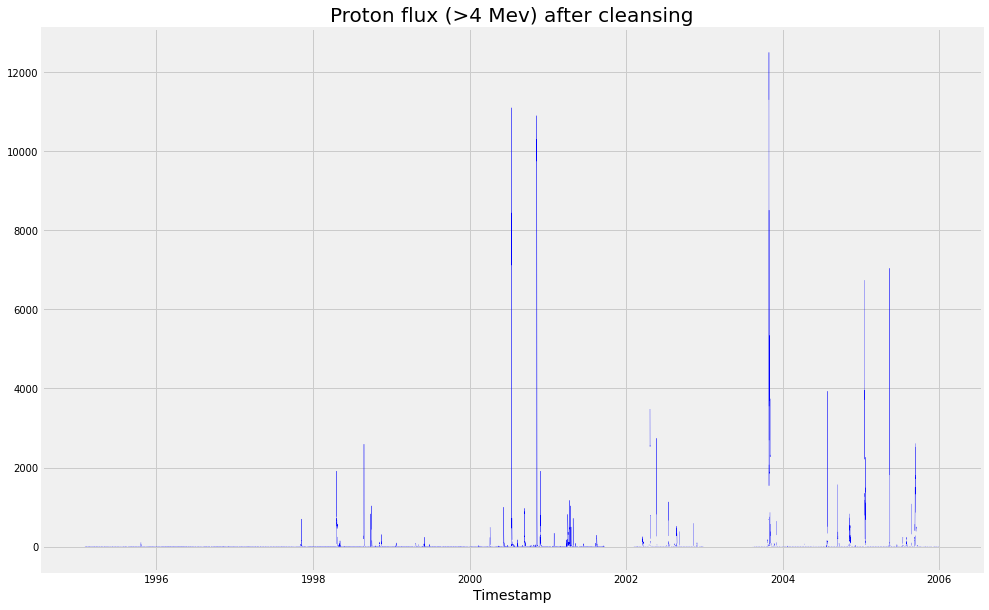

In [175]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>4 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>4 Mev) after cleansing', fontsize=20)

In [176]:
df_0['Proton flux (>4 Mev)'].describe()

count    60305.000000
mean        24.065019
std        304.449242
min          0.010000
25%          0.540000
50%          0.760000
75%          0.850000
max      12500.000000
Name: Proton flux (>4 Mev), dtype: float64

## 2.34.- Proton flux (>10 Mev)

Text(0.5, 1.0, 'Proton flux (>10 Mev)')

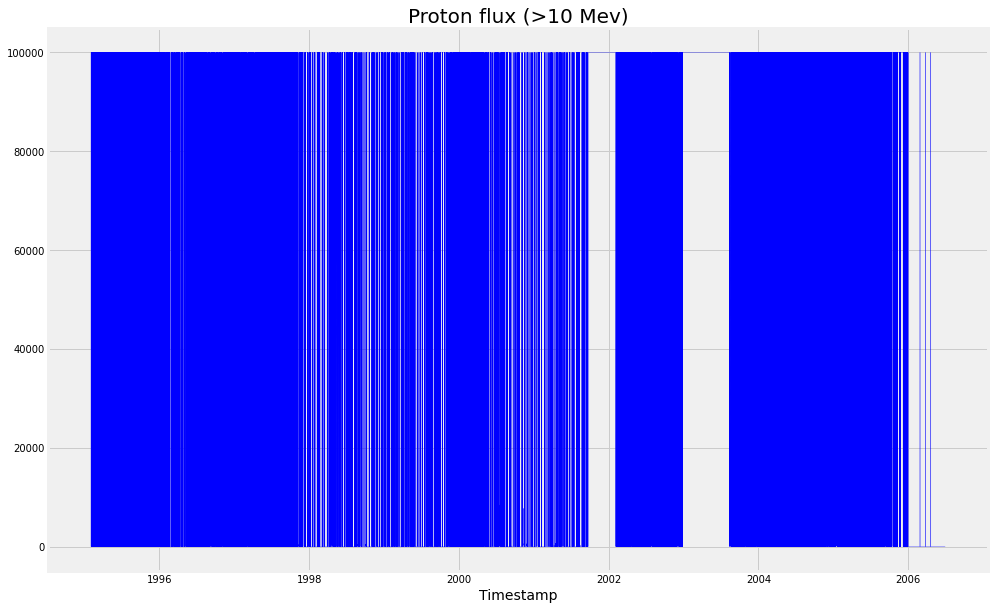

In [177]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>10 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>10 Mev)', fontsize=20)

In [178]:
df_0['Proton flux (>10 Mev)'].max()

99999.99

DataRobot identified outliers in this feature with a value of 99999.99

We will replace outliers with nans

In [179]:
df_0['Proton flux (>10 Mev)'] = np.where(df_0['Proton flux (>10 Mev)'] >= 99999.99, np.nan, df_0['Proton flux (>10 Mev)'])

The resulting percentage of missing values is:

In [180]:
df_0['Proton flux (>10 Mev)'].isna().sum()*100/df_0.shape[0]

35.38567658349328

Text(0.5, 1.0, 'Proton flux (>10 Mev) after cleansing')

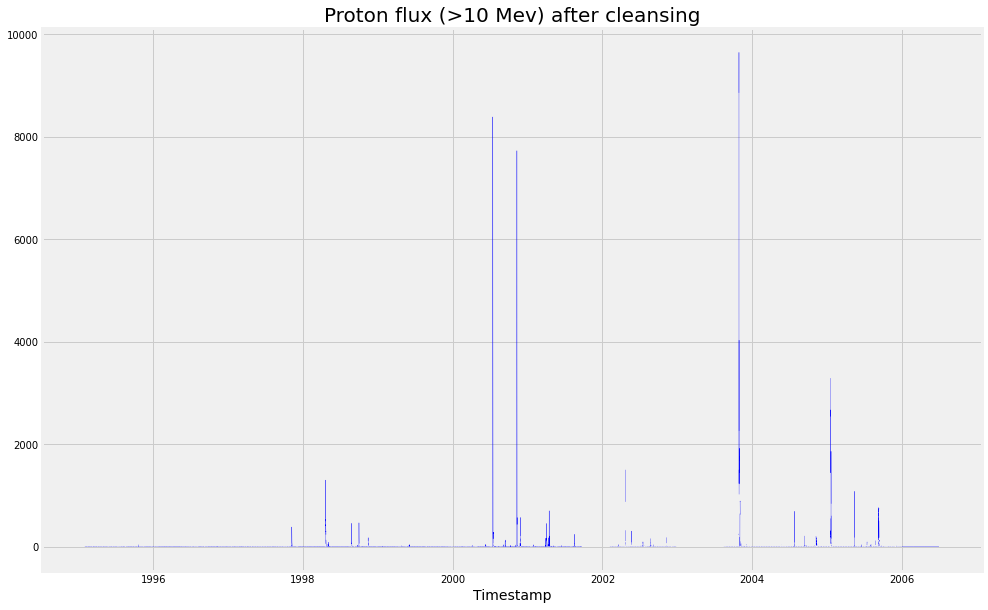

In [181]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>10 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>10 Mev) after cleansing', fontsize=20)

In [182]:
df_0['Proton flux (>10 Mev)'].describe()

count    64635.000000
mean        10.301882
std        185.991615
min          0.010000
25%          0.400000
50%          0.670000
75%          0.760000
max       9650.000000
Name: Proton flux (>10 Mev), dtype: float64

## 2.35.- Proton flux (>30 Mev)

Text(0.5, 1.0, 'Proton flux (>30 Mev)')

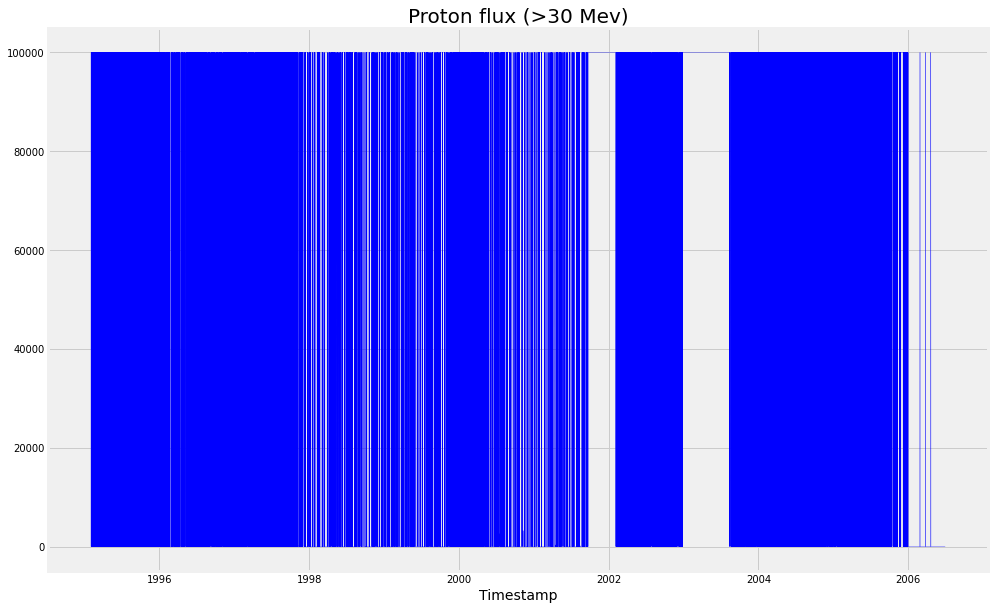

In [183]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>30 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>30 Mev)', fontsize=20)

In [184]:
df_0['Proton flux (>30 Mev)'].max()

99999.99

DataRobot identified outliers in this feature with a value of 99999.99

We will replace outliers with nans

In [185]:
df_0['Proton flux (>30 Mev)'] = np.where(df_0['Proton flux (>30 Mev)'] >= 99999.99, np.nan, df_0['Proton flux (>30 Mev)'])

The resulting percentage of missing values is:

In [186]:
df_0['Proton flux (>30 Mev)'].isna().sum()*100/df_0.shape[0]

35.41766634676903

Text(0.5, 1.0, 'Proton flux (>30 Mev) after cleansing')

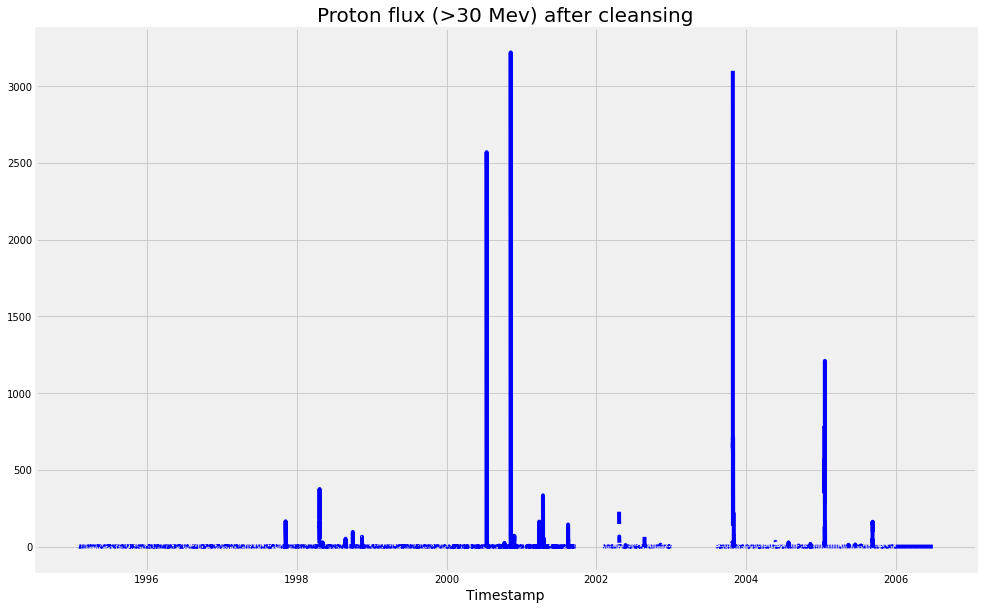

In [187]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>30 Mev)'], color='blue')

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>30 Mev) after cleansing', fontsize=20)

In [188]:
df_0['Proton flux (>30 Mev)'].describe()

count    64603.000000
mean         3.176934
std         63.363991
min          0.010000
25%          0.320000
50%          0.540000
75%          0.650000
max       3220.000000
Name: Proton flux (>30 Mev), dtype: float64

## 2.36.- Proton flux (>60 Mev)

Text(0.5, 1.0, 'Proton flux (>60 Mev)')

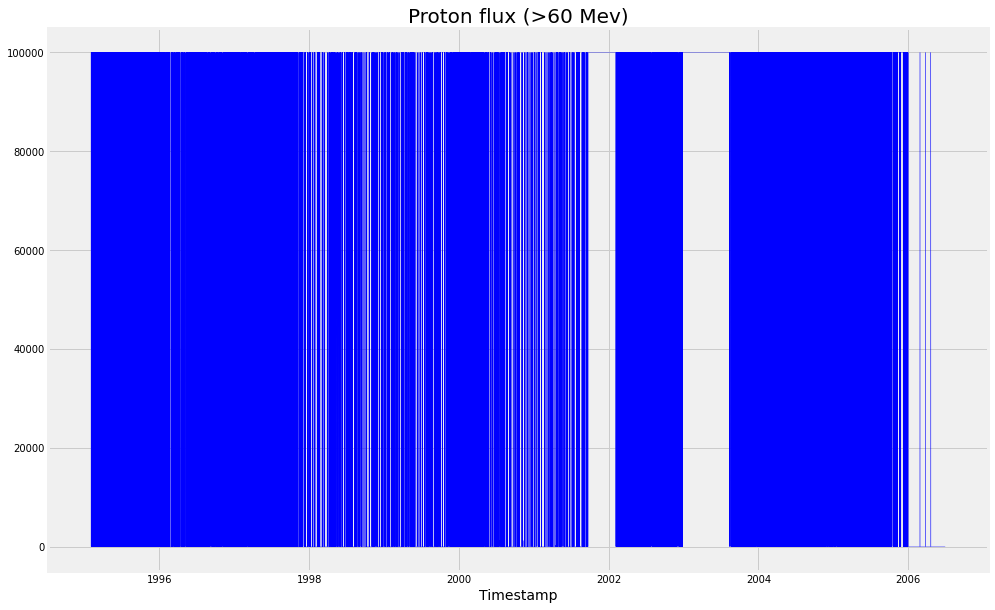

In [189]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>60 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>60 Mev)', fontsize=20)

In [190]:
df_0['Proton flux (>60 Mev)'].max()

99999.99

DataRobot identified outliers in this feature with a value of 99999.99

We will replace outliers with nans

In [191]:
df_0['Proton flux (>60 Mev)'] = np.where(df_0['Proton flux (>60 Mev)'] >= 99999.99, np.nan, df_0['Proton flux (>60 Mev)'])

The resulting percentage of missing values is:

In [192]:
df_0['Proton flux (>60 Mev)'].isna().sum()*100/df_0.shape[0]

35.43166186820218

Text(0.5, 1.0, 'Proton flux (>60 Mev) after cleansing')

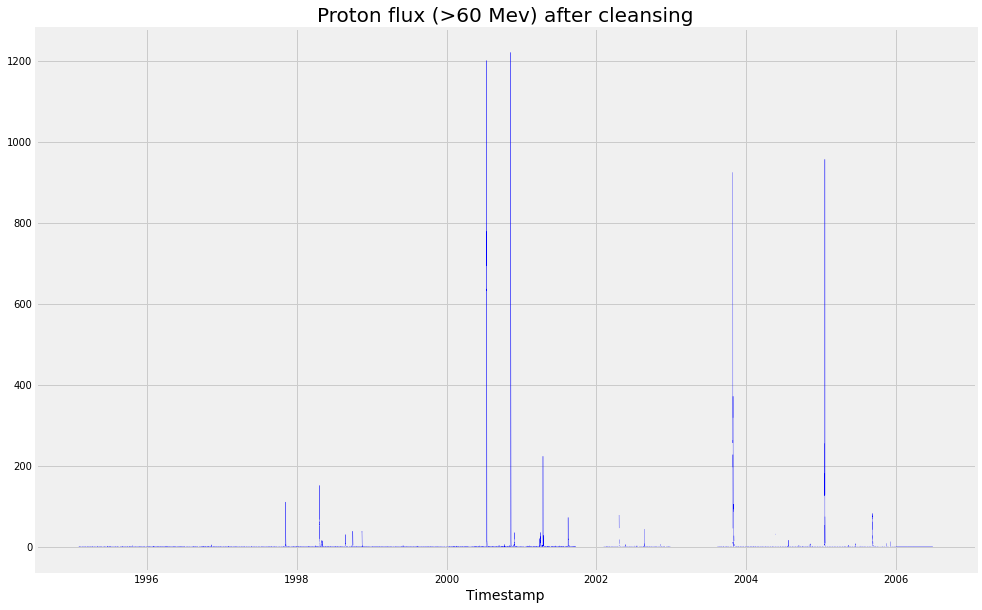

In [193]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Proton flux (>60 Mev)'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Proton flux (>60 Mev) after cleansing', fontsize=20)

In [194]:
df_0['Proton flux (>60 Mev)'].describe()

count    64589.000000
mean         1.454939
std         23.750128
min          0.010000
25%          0.260000
50%          0.420000
75%          0.530000
max       1220.000000
Name: Proton flux (>60 Mev), dtype: float64

## 2.37.- Flux Flag

Text(0.5, 1.0, 'Flux Flag')

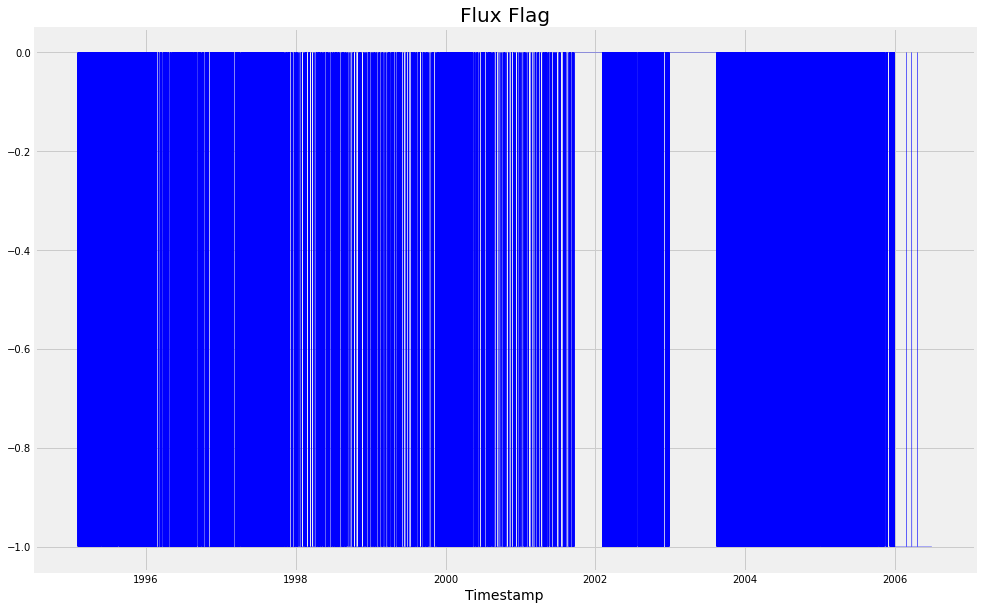

In [195]:
plt.figure(figsize=(15,10))
plt.plot(df_0.index, df_0['Flux FLAG'], color='blue', linewidth = 0.3)

plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title('Flux Flag', fontsize=20)

In [196]:
df_0['Flux FLAG'].value_counts()

-1    64650
 0    35382
Name: Flux FLAG, dtype: int64

# 3.- Save cleansed data to disk

In [197]:
df_0.reset_index(inplace=True)

In [198]:
df_0.to_csv('Data/merged_f0F2_solar_geomagnetic_v2.csv', index=False)